In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns

C:\Users\rafae\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("pns2019.csv")

In [3]:
df.head()

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
0,11,1110011,110000016,1,1,2019,6.0,1,1,1.0,...,1.0,6.0,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20210825
1,11,1110011,110000016,1,1,2019,6.0,1,1,0.0,...,NaN,NaN,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20210825
2,11,1110011,110000016,1,1,2019,6.0,1,1,0.0,...,1.0,4.0,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20210825
3,11,1110011,110000016,1,1,2019,6.0,1,1,9.0,...,NaN,NaN,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20210825
4,11,1110011,110000016,1,1,2019,6.0,1,1,9.0,...,NaN,NaN,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20210825


In [4]:
df['Q092']

0         1.0
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
293721    NaN
293722    NaN
293723    NaN
293724    NaN
293725    NaN
Name: Q092, Length: 293726, dtype: float64

In [5]:
# Filtrar pessoas com depressão
df_depressao = df[df['Q092'] == 1]

In [6]:
df_depressao

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
0,11,1110011,110000016,1,1,2019,6.0,1,1,1.0,...,1.0,6.0,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20210825
51,11,1110011,110000034,4,1,2019,3.0,1,1,1.0,...,1.0,9.0,19960.0,6653.0,7.0,NaN,3.0,NaN,NaN,20210825
62,11,1110011,110000034,10,1,2019,2.0,1,1,1.0,...,1.0,9.0,20000.0,10000.0,7.0,NaN,1.0,NaN,NaN,20210825
73,11,1110011,110000034,14,1,2019,3.0,1,1,1.0,...,1.0,9.0,7000.0,2333.0,5.0,NaN,1.0,1.0,NaN,20210825
181,11,1110011,110000584,12,1,2019,3.0,1,1,1.0,...,NaN,NaN,2994.0,998.0,3.0,NaN,NaN,1.0,NaN,20210825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293584,53,5310220,530037924,6,1,2019,3.0,2,1,1.0,...,1.0,4.0,3400.0,1133.0,4.0,NaN,3.0,NaN,1.0,20210825
293610,53,5310220,530037924,15,1,2019,3.0,2,1,1.0,...,1.0,4.0,9594.0,3198.0,6.0,NaN,1.0,NaN,NaN,20210825
293629,53,5310220,530038867,8,1,2019,7.0,2,1,1.0,...,1.0,11.0,3330.0,476.0,2.0,NaN,NaN,NaN,NaN,20210825
293694,53,5310220,530044434,5,1,2019,2.0,2,1,1.0,...,1.0,1.0,2400.0,1200.0,4.0,NaN,3.0,NaN,NaN,20210825


In [7]:
# Filtrar pessoas com idade entre 14 e 30 anos
df_depressao_idade = df_depressao[(df_depressao['C008'] >= 20) & (df_depressao['C008'] <= 40)]

In [8]:
df_depressao_idade['C008']

62        33.0
393       30.0
675       37.0
1009      36.0
1276      29.0
          ... 
293066    36.0
293071    28.0
293098    25.0
293255    34.0
293268    29.0
Name: C008, Length: 2279, dtype: float64

In [9]:
contagem_por_idade = df_depressao_idade.groupby('C008').size()

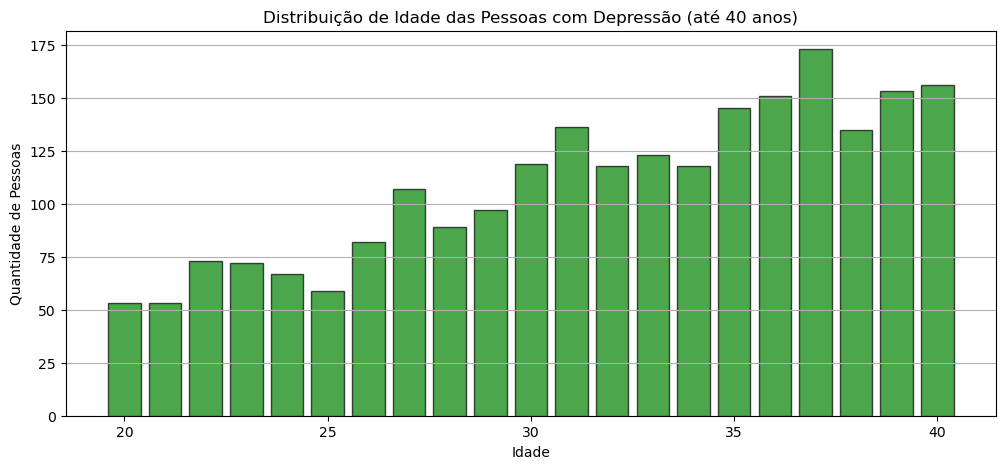

In [10]:
plt.figure(figsize=(12,5))  # Tamanho maior
plt.bar(contagem_por_idade.index, contagem_por_idade.values, color='green', edgecolor='black', alpha=0.7)  # Ajuste o espaçamento aqui
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas')
plt.title('Distribuição de Idade das Pessoas com Depressão (até 40 anos)')
plt.grid(axis='y')  # Adiciona linhas de grade no eixo y
plt.show()

In [11]:
df_depressao_idade

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
62,11,1110011,110000034,10,1,2019,2.0,1,1,1.0,...,1.0,9.0,20000.0,10000.0,7.0,NaN,1.0,NaN,NaN,20210825
393,11,1110011,110003808,7,1,2019,3.0,1,1,1.0,...,NaN,NaN,250.0,83.0,1.0,NaN,NaN,NaN,5.0,20210825
675,11,1110011,110005834,11,1,2019,4.0,1,1,1.0,...,1.0,6.0,10400.0,2600.0,5.0,NaN,2.0,NaN,1.0,20210825
1009,11,1110011,110009624,13,1,2019,3.0,1,1,1.0,...,1.0,8.0,5001.0,1667.0,4.0,NaN,2.0,NaN,3.0,20210825
1276,11,1110011,110012191,14,1,2019,3.0,1,1,1.0,...,NaN,NaN,3000.0,1000.0,4.0,NaN,NaN,NaN,5.0,20210825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293066,53,5310213,530022533,1,1,2019,3.0,1,1,1.0,...,1.0,7.0,5016.0,1672.0,4.0,NaN,2.0,NaN,NaN,20210825
293071,53,5310213,530022533,4,1,2019,1.0,1,1,1.0,...,1.0,10.0,1500.0,1500.0,4.0,NaN,4.0,NaN,NaN,20210825
293098,53,5310213,530025127,1,1,2019,3.0,1,1,1.0,...,1.0,6.0,2896.0,965.0,3.0,NaN,1.0,NaN,NaN,20210825
293255,53,5310213,530041745,14,1,2019,3.0,1,1,1.0,...,1.0,10.0,4198.0,1399.0,4.0,NaN,4.0,NaN,NaN,20210825


In [12]:
# Filtrar por sexo feminino
df_feminino = df_depressao_idade[df_depressao_idade['C006'] == 2 ]
contagem_por_idade_feminino = df_feminino.groupby('C008').size()

# Filtrar por sexo masculino
df_masculino = df_depressao_idade[df_depressao_idade['C006'] == 1]
contagem_por_idade_masculino = df_masculino.groupby('C008').size()

In [13]:
df_feminino

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
62,11,1110011,110000034,10,1,2019,2.0,1,1,1.0,...,1.0,9.0,20000.0,10000.0,7.0,NaN,1.0,NaN,NaN,20210825
393,11,1110011,110003808,7,1,2019,3.0,1,1,1.0,...,NaN,NaN,250.0,83.0,1.0,NaN,NaN,NaN,5.0,20210825
675,11,1110011,110005834,11,1,2019,4.0,1,1,1.0,...,1.0,6.0,10400.0,2600.0,5.0,NaN,2.0,NaN,1.0,20210825
1009,11,1110011,110009624,13,1,2019,3.0,1,1,1.0,...,1.0,8.0,5001.0,1667.0,4.0,NaN,2.0,NaN,3.0,20210825
1276,11,1110011,110012191,14,1,2019,3.0,1,1,1.0,...,NaN,NaN,3000.0,1000.0,4.0,NaN,NaN,NaN,5.0,20210825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292937,53,5310213,530007735,15,1,2019,4.0,1,1,1.0,...,1.0,5.0,6300.0,1575.0,4.0,NaN,1.0,NaN,6.0,20210825
293058,53,5310213,530016054,11,1,2019,3.0,1,1,1.0,...,1.0,11.0,1200.0,400.0,2.0,NaN,4.0,NaN,NaN,20210825
293071,53,5310213,530022533,4,1,2019,1.0,1,1,1.0,...,1.0,10.0,1500.0,1500.0,4.0,NaN,4.0,NaN,NaN,20210825
293098,53,5310213,530025127,1,1,2019,3.0,1,1,1.0,...,1.0,6.0,2896.0,965.0,3.0,NaN,1.0,NaN,NaN,20210825


In [14]:
df_masculino

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
1817,11,1110011,110019110,11,1,2019,2.0,1,1,1.0,...,1.0,7.0,5280.0,2640.0,5.0,NaN,1.0,NaN,NaN,20210825
2496,11,1110012,110006766,9,1,2019,4.0,1,1,1.0,...,NaN,NaN,25947.0,6487.0,7.0,NaN,NaN,NaN,NaN,20210825
3970,11,1151011,110014423,12,1,2019,5.0,1,4,1.0,...,2.0,NaN,2000.0,400.0,2.0,NaN,NaN,NaN,NaN,20210825
4004,11,1151011,110020194,7,1,2019,4.0,1,4,1.0,...,1.0,10.0,3700.0,925.0,3.0,NaN,1.0,1.0,NaN,20210825
5018,11,1151020,110021840,9,1,2019,5.0,2,4,1.0,...,NaN,NaN,10600.0,2120.0,5.0,NaN,NaN,1.0,NaN,20210825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290471,53,5310211,530022287,14,1,2019,3.0,1,1,1.0,...,NaN,NaN,15000.0,5000.0,7.0,NaN,NaN,NaN,NaN,20210825
291292,53,5310211,530038001,5,1,2019,2.0,1,1,1.0,...,NaN,NaN,998.0,499.0,2.0,NaN,NaN,NaN,NaN,20210825
293004,53,5310213,530014488,9,1,2019,4.0,1,1,1.0,...,1.0,6.0,21000.0,5250.0,7.0,NaN,2.0,NaN,NaN,20210825
293066,53,5310213,530022533,1,1,2019,3.0,1,1,1.0,...,1.0,7.0,5016.0,1672.0,4.0,NaN,2.0,NaN,NaN,20210825


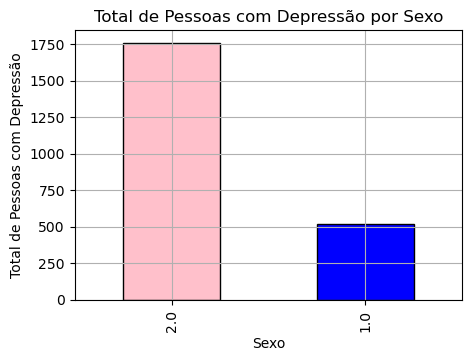

In [15]:
contagem_por_sexo = df_depressao_idade['C006'].value_counts()

plt.figure(figsize=(5, 3.5))
contagem_por_sexo.plot(kind='bar', edgecolor='black', color=['pink', 'blue'])

plt.title('Total de Pessoas com Depressão por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Total de Pessoas com Depressão')
plt.grid(True)
plt.show()

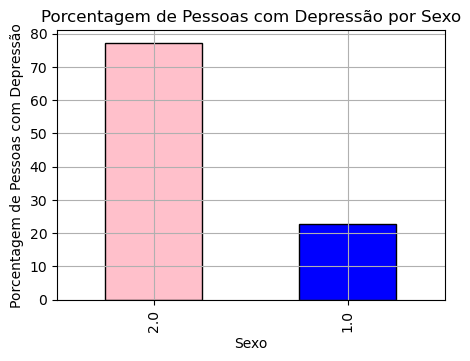

In [16]:
contagem_por_sexo = df_depressao_idade['C006'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3.5))
contagem_por_sexo.plot(kind='bar', edgecolor='black', color=['pink', 'blue'])

plt.title('Porcentagem de Pessoas com Depressão por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Porcentagem de Pessoas com Depressão')
plt.grid(True)
plt.show()

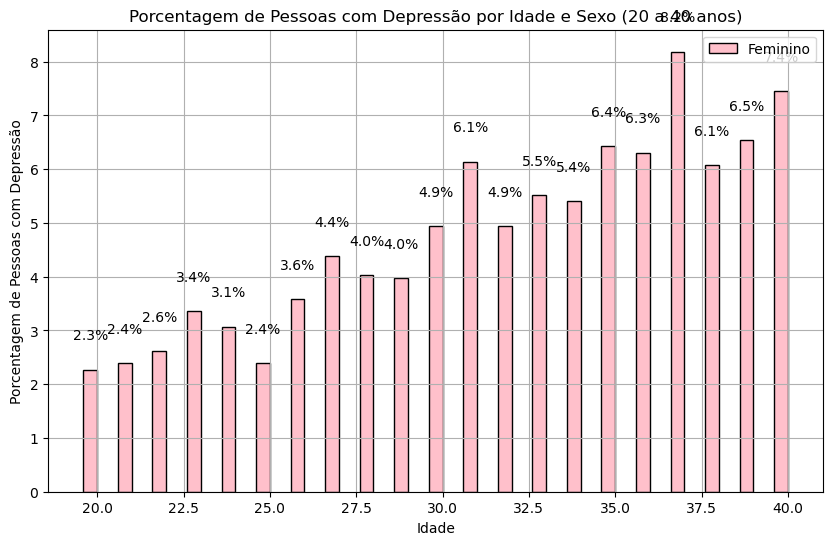

In [17]:
total_feminino = contagem_por_idade_feminino.sum()

plt.figure(figsize=(10, 6))

# Plotando as barras para o sexo feminino
plt.bar(contagem_por_idade_feminino.index - 0.2, contagem_por_idade_feminino / total_feminino * 100, width=0.4, label='Feminino', edgecolor='black', color=['pink'])
# Adicionando os valores de porcentagem acima das barras para o sexo feminino
for x, y in zip(contagem_por_idade_feminino.index - 0.2, contagem_por_idade_feminino / total_feminino * 100):
    plt.text(x, y + 0.5, f'{y:.1f}%', ha='center', va='bottom')

plt.title('Porcentagem de Pessoas com Depressão por Idade e Sexo (20 a 40 anos)')
plt.xlabel('Idade')
plt.ylabel('Porcentagem de Pessoas com Depressão')
plt.legend()
plt.grid(True)
plt.show()


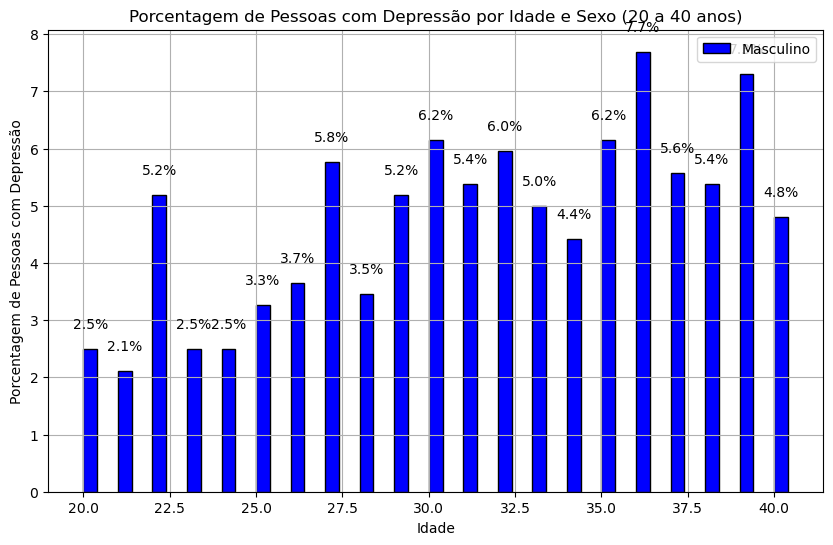

In [18]:
total_masculino = contagem_por_idade_masculino.sum()

plt.figure(figsize=(10, 6))

# Plotando as barras para o sexo masculino
plt.bar(contagem_por_idade_masculino.index + 0.2, contagem_por_idade_masculino / total_masculino * 100, width=0.4, label='Masculino', edgecolor='black', color=['blue'])
# Adicionando os valores de porcentagem acima das barras para o sexo masculino
for x, y in zip(contagem_por_idade_masculino.index + 0.2, contagem_por_idade_masculino / total_masculino * 100):
    plt.text(x, y + 0.3, f'{y:.1f}%', ha='center', va='bottom')

plt.title('Porcentagem de Pessoas com Depressão por Idade e Sexo (20 a 40 anos)')
plt.xlabel('Idade')
plt.ylabel('Porcentagem de Pessoas com Depressão')
plt.legend()
plt.grid(True)
plt.show()


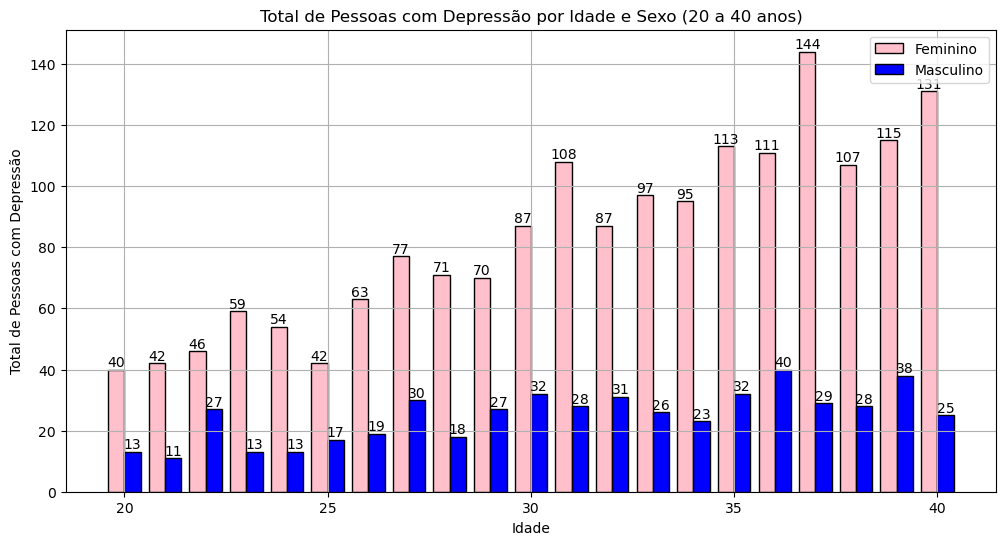

In [19]:
plt.figure(figsize=(12, 6))

# Plotando as barras para o sexo feminino
plt.bar(contagem_por_idade_feminino.index - 0.2, contagem_por_idade_feminino, width=0.4, label='Feminino', edgecolor='black', color=['pink'])
# Adicionando os valores absolutos acima das barras para o sexo feminino
for x, y in zip(contagem_por_idade_feminino.index - 0.2, contagem_por_idade_feminino):
    plt.text(x, y + 0.05, str(int(y)), ha='center', va='bottom')

# Plotando as barras para o sexo masculino
plt.bar(contagem_por_idade_masculino.index + 0.2, contagem_por_idade_masculino, width=0.4, label='Masculino', edgecolor='black', color=['blue'])
# Adicionando os valores absolutos acima das barras para o sexo masculino
for x, y in zip(contagem_por_idade_masculino.index + 0.2, contagem_por_idade_masculino):
    plt.text(x, y + 0.05, str(int(y)), ha='center', va='bottom')

plt.title('Total de Pessoas com Depressão por Idade e Sexo (20 a 40 anos)')
plt.xlabel('Idade')
plt.ylabel('Total de Pessoas com Depressão')
plt.legend()
plt.grid(True)
plt.show()


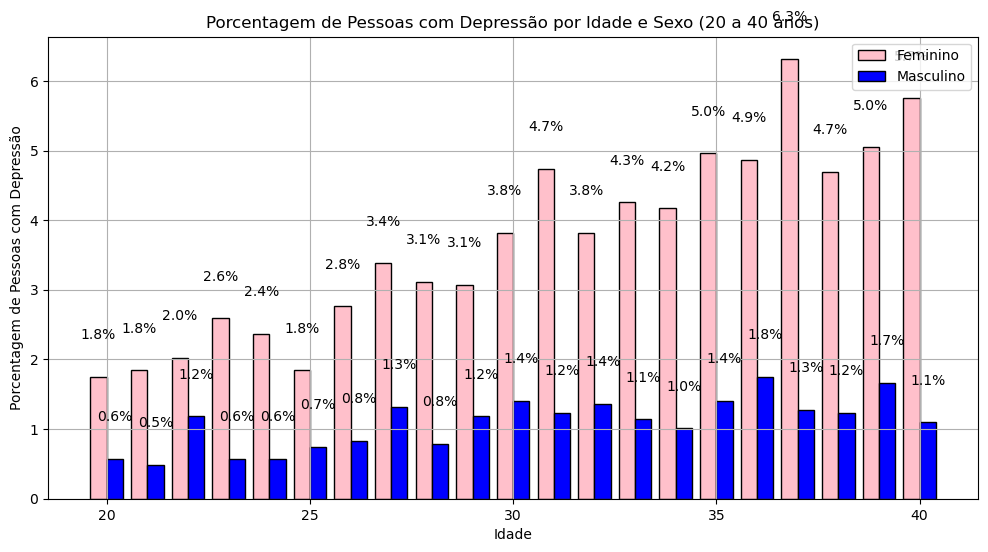

In [20]:
total_genero = df_depressao_idade['C006'].count()


plt.figure(figsize=(12, 6))

# Plotando as barras para o sexo feminino
plt.bar(contagem_por_idade_feminino.index - 0.2, contagem_por_idade_feminino / total_genero * 100, width=0.4, label='Feminino', edgecolor='black', color=['pink'])
# Adicionando os valores de porcentagem acima das barras para o sexo feminino
for x, y in zip(contagem_por_idade_feminino.index - 0.2, contagem_por_idade_feminino / total_genero * 100):
    plt.text(x, y + 0.5, f'{y:.1f}%', ha='center', va='bottom')

# Plotando as barras para o sexo masculino
plt.bar(contagem_por_idade_masculino.index + 0.2, contagem_por_idade_masculino / total_genero * 100, width=0.4, label='Masculino', edgecolor='black', color=['blue'])
# Adicionando os valores de porcentagem acima das barras para o sexo masculino
for x, y in zip(contagem_por_idade_masculino.index + 0.2, contagem_por_idade_masculino / total_genero * 100):
    plt.text(x, y + 0.5, f'{y:.1f}%', ha='center', va='bottom')

plt.title('Porcentagem de Pessoas com Depressão por Idade e Sexo (20 a 40 anos)')
plt.xlabel('Idade')
plt.ylabel('Porcentagem de Pessoas com Depressão')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
print(total_genero)
print(total_masculino)
print(total_feminino)

2279
520
1759


In [22]:
df_depressao_idade['C006'].value_counts()

C006
2.0    1759
1.0     520
Name: count, dtype: int64

In [23]:
contagem_por_sexo

C006
2.0    77.182975
1.0    22.817025
Name: proportion, dtype: float64

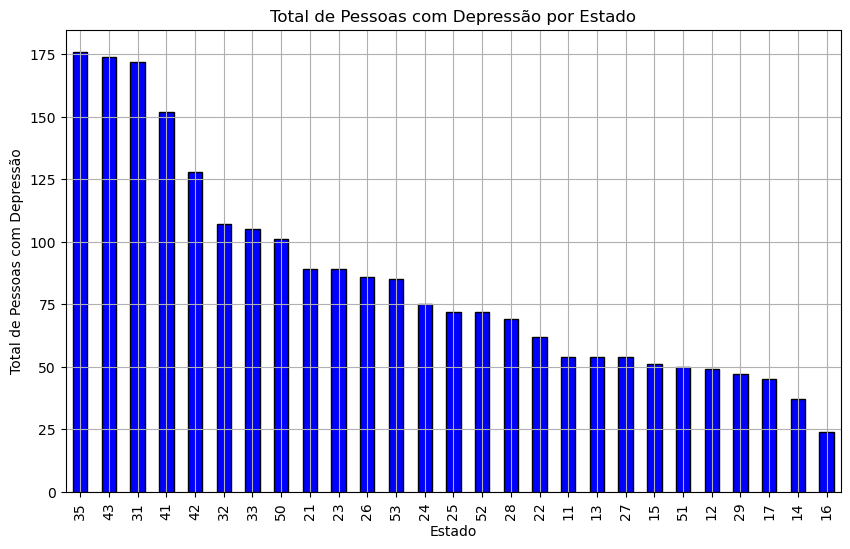

In [24]:
# Contar o número total de pessoas com depressão por região
contagem_por_estado = df_depressao_idade['V0001'].value_counts()

# Criar um gráfico de barras para o total por região
plt.figure(figsize=(10, 6))
contagem_por_estado.plot(kind='bar', edgecolor='black', color=['blue'])

plt.title('Total de Pessoas com Depressão por Estado')
plt.xlabel('Estado')
plt.ylabel('Total de Pessoas com Depressão')
plt.grid(True)
plt.show()

## Legenda

35	São Paulo <br>
43	Rio Grande do Sul <br>
31	Minas Gerais<br>
41	Paraná<br>
42	Santa Catarina<br>
32	Espírito Santo<br>
33	Rio de Janeiro<br>
50	Mato Grosso do Sul<br>
21	Maranhão<br>
23	Ceará<br>
26	Pernambuco<br>
53	Distrito Federal<br>
24	Rio Grande do Norte<br>
25	Paraíba<br>
52	Goiás<br>
28	Sergipe<br>
22	Piauí<br>
11	Rondônia<br>
13	Amazonas<br>
27	Alagoas<br>
15	Pará<br>
51	Mato Grosso<br>
12	Acre<br>
29	Bahia<br>
17	Tocantins<br>
14	Roraima<br>
16	Amapá<br>

In [25]:
df_depressao_idade['V0001'].value_counts()

V0001
35    176
43    174
31    172
41    152
42    128
32    107
33    105
50    101
21     89
23     89
26     86
53     85
24     75
25     72
52     72
28     69
22     62
11     54
13     54
27     54
15     51
51     50
12     49
29     47
17     45
14     37
16     24
Name: count, dtype: int64

## FILTRANDO OS ESTADOS

In [26]:
#FSÃO PAULO
df_SP = df_depressao_idade[df_depressao_idade['V0001'] == 35]

In [27]:
df_SP

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
210238,35,3510111,350101587,7,1,2019,3.0,1,1,1.0,...,1.0,7.0,11000.0,3667.0,6.0,NaN,2.0,NaN,3.0,20210825
210259,35,3510111,350107246,7,1,2019,1.0,1,1,1.0,...,1.0,9.0,12000.0,12000.0,7.0,NaN,4.0,1.0,NaN,20210825
210289,35,3510111,350109504,12,1,2019,2.0,1,1,1.0,...,NaN,NaN,12000.0,6000.0,7.0,NaN,NaN,NaN,6.0,20210825
210301,35,3510111,350112469,9,1,2019,1.0,1,1,1.0,...,1.0,2.0,12298.0,12298.0,7.0,NaN,4.0,NaN,5.0,20210825
210642,35,3510111,350268337,4,1,2019,2.0,1,1,1.0,...,1.0,7.0,11000.0,5500.0,7.0,NaN,4.0,1.0,7.0,20210825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227739,35,3555011,350068180,1,1,2019,2.0,1,4,1.0,...,1.0,7.0,4000.0,2000.0,5.0,NaN,NaN,NaN,8.0,20210825
227792,35,3555011,350106122,11,1,2019,2.0,1,4,1.0,...,1.0,9.0,54098.0,27049.0,7.0,NaN,2.0,NaN,NaN,20210825
227912,35,3555011,350603150,10,1,2019,3.0,1,4,1.0,...,NaN,NaN,500.0,167.0,1.0,NaN,NaN,NaN,NaN,20210825
228285,35,3555013,350021252,3,1,2019,5.0,1,4,1.0,...,2.0,NaN,4500.0,900.0,3.0,NaN,NaN,NaN,NaN,20210825


In [28]:
#RONDONIA
df_RO = df_depressao_idade[df_depressao_idade['V0001'] == 11]

In [29]:
df_RO.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 62 to 7384
Columns: 1087 entries, V0001 to VDDATA
dtypes: float64(1078), int64(9)
memory usage: 459.0 KB


In [30]:
df_MG = df_depressao_idade[df_depressao_idade['V0001'] == 31]#minas gerais

In [31]:
df_MG

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
169233,31,3110111,310050752,6,1,2019,2.0,1,1,1.0,...,1.0,6.0,4098.0,2049.0,5.0,NaN,3.0,NaN,NaN,20210825
169330,31,3110111,310120040,1,1,2019,4.0,1,1,1.0,...,1.0,8.0,7100.0,1775.0,4.0,NaN,4.0,NaN,NaN,20210825
169435,31,3110111,310131712,12,1,2019,3.0,1,1,1.0,...,1.0,9.0,29851.0,9950.0,7.0,NaN,4.0,NaN,5.0,20210825
169461,31,3110111,310135477,10,1,2019,4.0,1,1,1.0,...,NaN,NaN,12000.0,3000.0,6.0,NaN,NaN,NaN,NaN,20210825
169469,31,3110111,310136388,1,1,2019,4.0,1,1,1.0,...,NaN,NaN,1996.0,499.0,2.0,NaN,NaN,2.0,NaN,20210825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183975,31,3156012,310079289,9,1,2019,4.0,1,4,1.0,...,1.0,4.0,3000.0,750.0,3.0,NaN,4.0,NaN,2.0,20210825
184144,31,3156013,310051740,1,1,2019,2.0,1,4,1.0,...,1.0,2.0,2700.0,1350.0,4.0,NaN,NaN,2.0,5.0,20210825
184180,31,3156013,310076582,4,1,2019,4.0,1,4,1.0,...,1.0,9.0,3500.0,875.0,3.0,NaN,NaN,NaN,1.0,20210825
184321,31,3156021,310024324,7,1,2019,4.0,2,4,1.0,...,NaN,NaN,778.0,195.0,1.0,NaN,NaN,NaN,1.0,20210825


In [32]:
#Verificando coluna depressão
df_MG['Q092'].count()

172

#### Filtrando base inteira

In [33]:
#filtrando base INTEIRA entre 20  e 40 anos
df_idade = df[(df['C008'] >= 20) & (df['C008'] <= 40)]

In [34]:
#Somando total de respostas para a pergunta de depressão
df_idade['Q092'].count()

33321

##### Testando filtragem por estado

In [35]:
#Selecionando minas gerais
MG_Total = df_idade[df_idade['V0001'] == 31] #minas gerais



In [36]:
MG_Total['Q092'].count()

1640

In [37]:
#teste de valores de porcentagem
porcentagem_mg = (MG_Total['Q092'].value_counts(normalize=True) * 100).round(2)

In [38]:
porcentagem_mg

Q092
2.0    89.51
1.0    10.49
Name: proportion, dtype: float64

In [39]:
df_idade['Q092'].value_counts()

Q092
2.0    31042
1.0     2279
Name: count, dtype: int64

In [40]:
#Substituindo valores vazios
df_idade.loc[df_idade['Q092'].isnull(), 'Q092'] = 'Não Respondeu'

C:\Users\rafae\AppData\Local\Temp\ipykernel_12108\614419833.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Não Respondeu' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_idade.loc[df_idade['Q092'].isnull(), 'Q092'] = 'Não Respondeu'


In [41]:
df_idade.loc[df_idade['Q092'] == '0', 'Q092'] = 'Não respondeu'

In [42]:
df_idade['Q092'].count()

86995

### Apos varios testes, vamos separar estado por estado

In [43]:
df_AC = df_depressao_idade[df_depressao_idade['V0001'] == 12]#acre
#Separando o acre
AC_Total = df_idade[df_idade['V0001'] == 12]

#porcentagem
porcentagem_ac = ((df_AC['Q092'].count())/(AC_Total['Q092'].count()))*100
porcentagem_ac2 = (AC_Total['Q092'].value_counts(normalize=True) * 100).round(2)

#exibindo valores
print('Porcentagem ACRE: ',porcentagem_ac)
#print(AC_Total['Q092'].value_counts())
print('Porcentagem ACRE2: ',porcentagem_ac2)

Porcentagem ACRE:  1.9238319591676483
Porcentagem ACRE2:  Q092
Não Respondeu    59.64
2.0              38.44
1.0               1.92
Name: proportion, dtype: float64


In [44]:
#Rondonia
#Separando rondonia
#RO_Total = df_idade_total[df_idade_total['V0001'] == 11]
#estado_total = df_idade_total[df_idade_total['V0001'] == codigo] #semelhante ao ex: MG_total

#df_estado = df_idade[df_idade['V0001'] == codigo]#acre

#porcentagem
#porcentagem_ro = ((df_RO['Q092'].count())/(RO_Total['Q092'].count()))*100
#porcentagem_estado = ((df_estado['Q092'].count())/(AM_Total['Q092'].count()))*100

#exibindo valores
#print('Porcentagem RONDONIA: ',porcentagem_ro)
#print(RO_Total['Q092'].value_counts())#

In [45]:
#Separando amazonas
#AM_Total = df_idade_total[df_idade_total['V0001'] == 11]

#porcentagem
#porcentagem_am = ((df_AM['Q092'].count())/(AM_Total['Q092'].count()))*100

#exibindo valores
#print('Porcentagem AMAZONAS: ',porcentagem_am)
#print(AM_Total['Q092'].value_counts())
#print(AM_Total['Q092'].count())

In [46]:
# Dicionário que mapeia as siglas para os códigos
estados = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MT', 'MS', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
codigo_estado = {'AC': 12, 'AL': 27, 'AP': 16, 'AM': 13, 'BA': 29, 'CE': 23, 'DF': 53, 'ES': 32, 'GO': 52,
                 'MA': 21, 'MG': 31, 'MT': 51, 'MS': 50, 'PA': 15, 'PB': 25, 'PR': 41, 'PE': 26, 'PI': 22, 'RJ': 33,
                 'RN': 24, 'RS': 43, 'RO': 11, 'RR': 14, 'SC': 42, 'SP': 35, 'SE': 28, 'TO': 17}

# Iterar sobre as siglas dos estados
for estado in estados:
    # Obter o código do estado
    codigo = codigo_estado[estado]
    
    # Separando o estado
    df_idade_estado = df_idade[df_idade['V0001'] == codigo] #df_idade_total
    
    df_depre_idade_estado = df_depressao_idade[df_depressao_idade['V0001'] == codigo]
    
    
    # Calcular a porcentagem
    porcentagem_estado = ((df_depre_idade_estado['Q092'].count())/(df_idade_estado['Q092'].count()))*100
    
    # Exibir os resultados
    print(f'\nPorcentagem {estado} ({codigo}): {porcentagem_estado:.2f}%')
    #print(df_idade_estado['Q092'].value_counts())
    #print(df_idade_estado['Q092'].count())


Porcentagem AC (12): 1.92%

Porcentagem AL (27): 1.79%

Porcentagem AP (16): 1.14%

Porcentagem AM (13): 1.35%

Porcentagem BA (29): 1.44%

Porcentagem CE (23): 2.02%

Porcentagem DF (53): 3.43%

Porcentagem ES (32): 3.39%

Porcentagem GO (52): 2.95%

Porcentagem MA (21): 1.65%

Porcentagem MG (31): 3.84%

Porcentagem MT (51): 2.15%

Porcentagem MS (50): 4.01%

Porcentagem PA (15): 1.17%

Porcentagem PB (25): 2.41%

Porcentagem PR (41): 4.45%

Porcentagem PE (26): 2.35%

Porcentagem PI (22): 2.24%

Porcentagem RJ (33): 2.63%

Porcentagem RN (24): 2.52%

Porcentagem RS (43): 6.21%

Porcentagem RO (11): 2.37%

Porcentagem RR (14): 1.40%

Porcentagem SC (42): 4.10%

Porcentagem SP (35): 3.29%

Porcentagem SE (28): 2.70%

Porcentagem TO (17): 2.34%


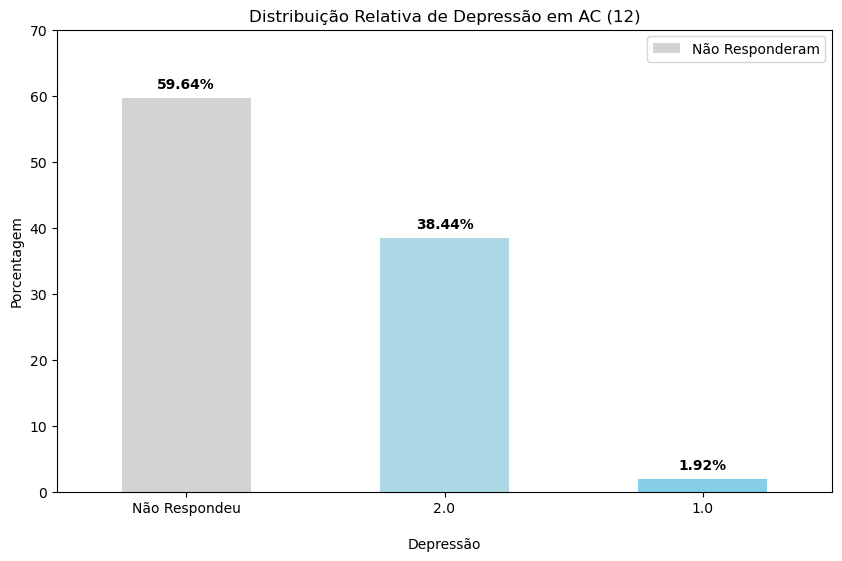

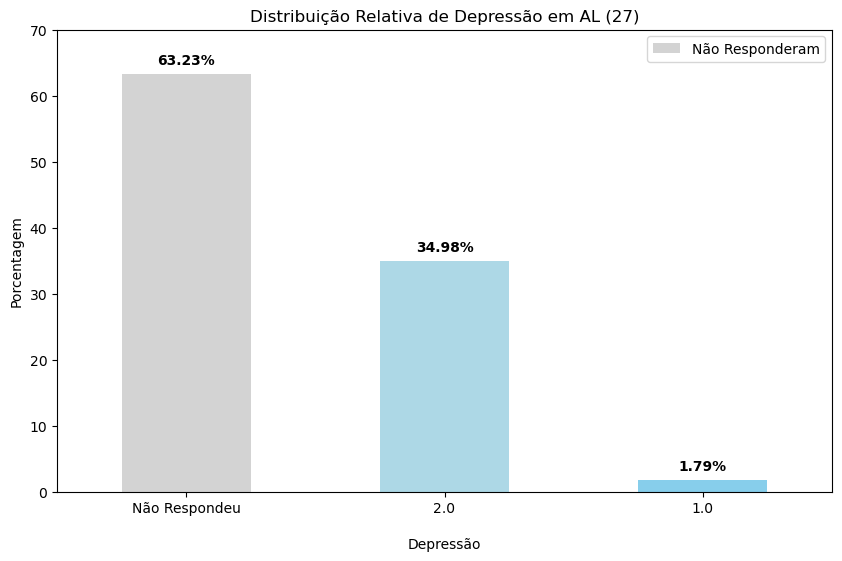

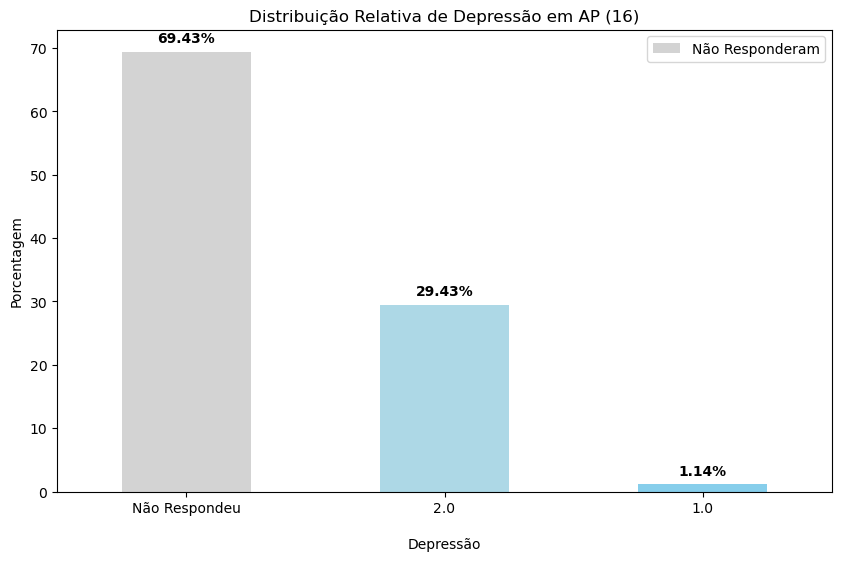

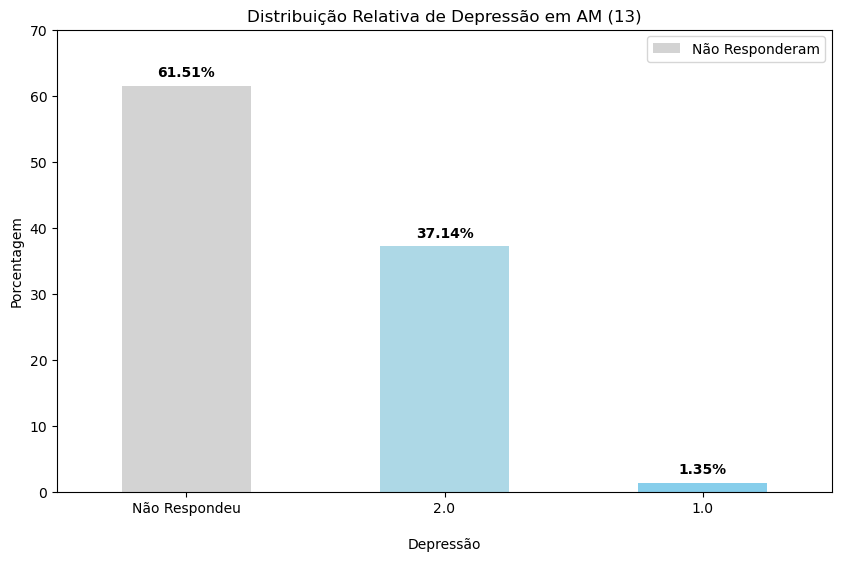

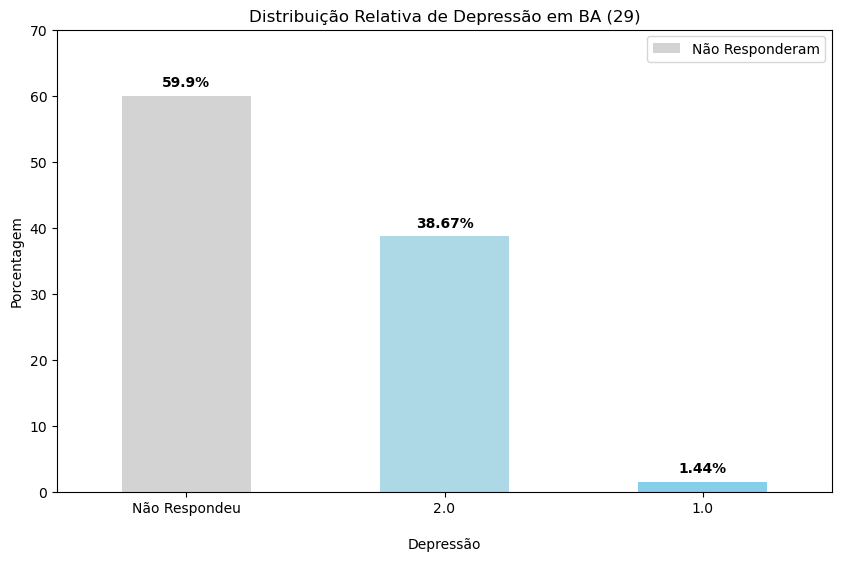

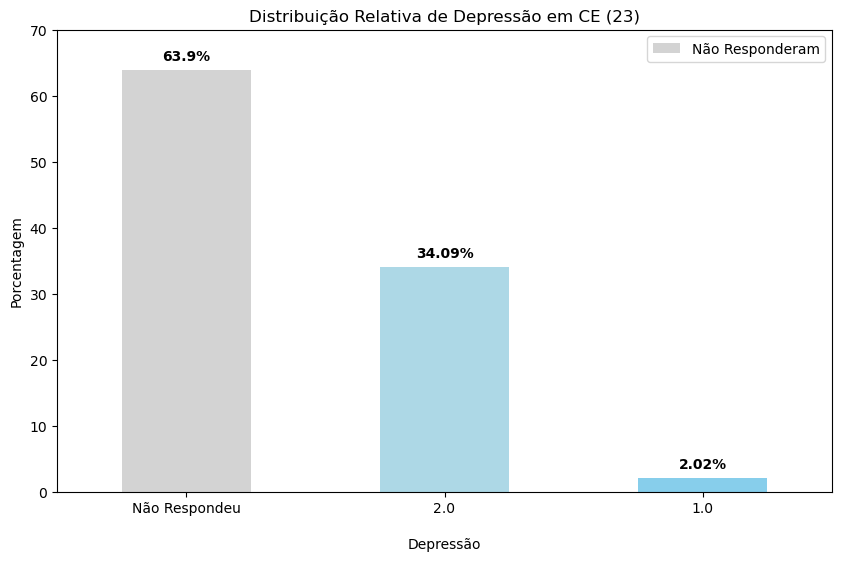

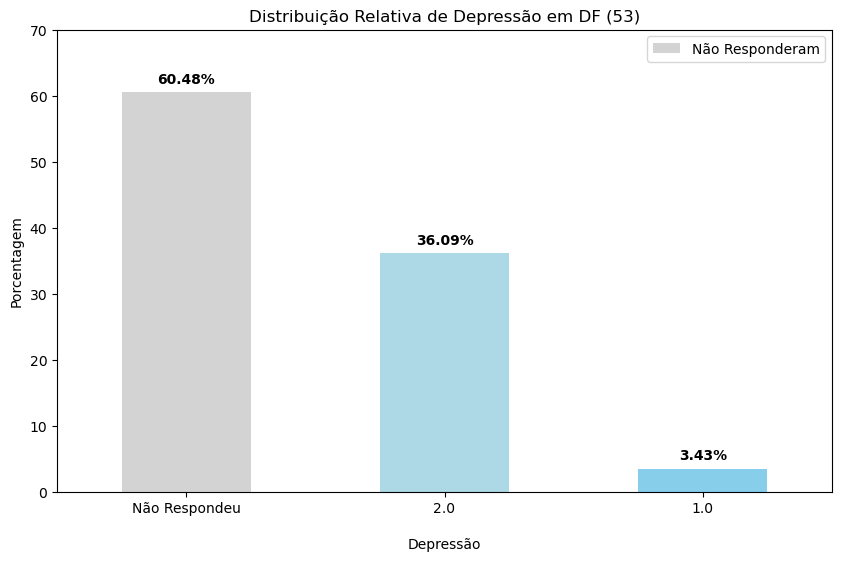

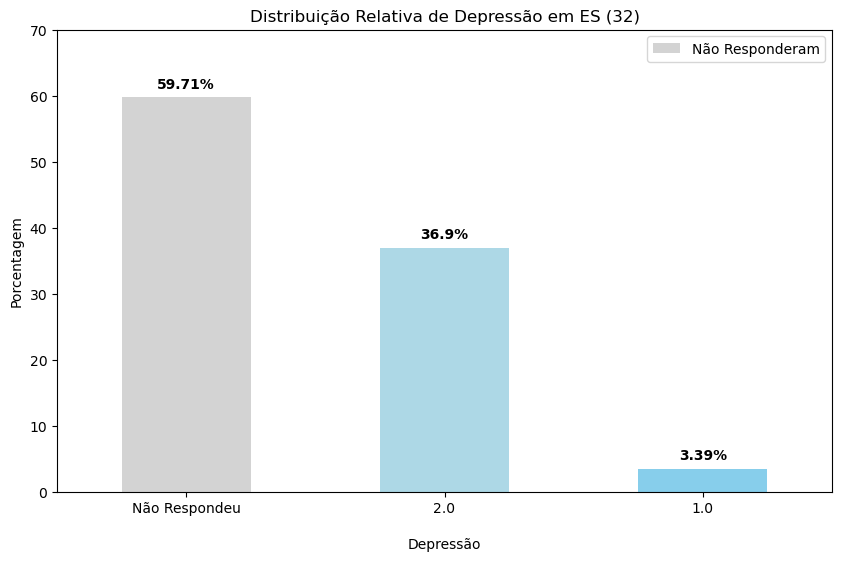

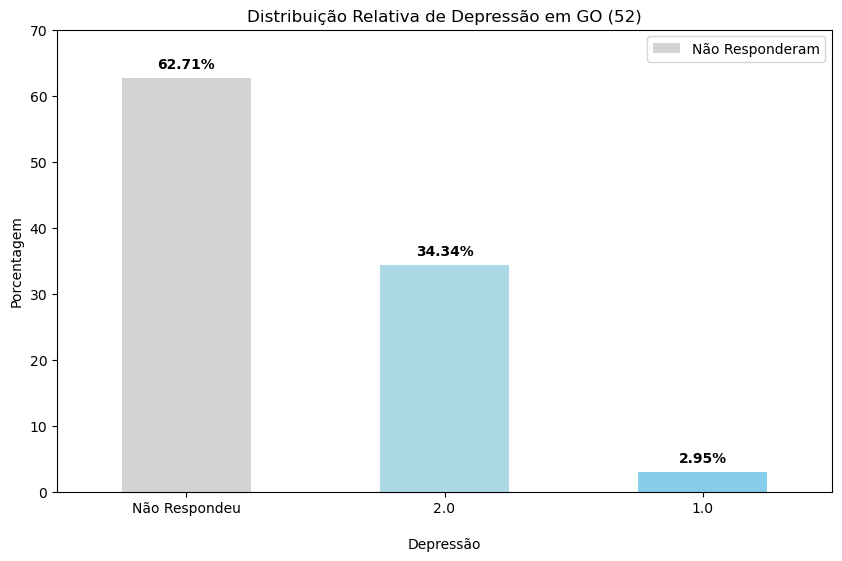

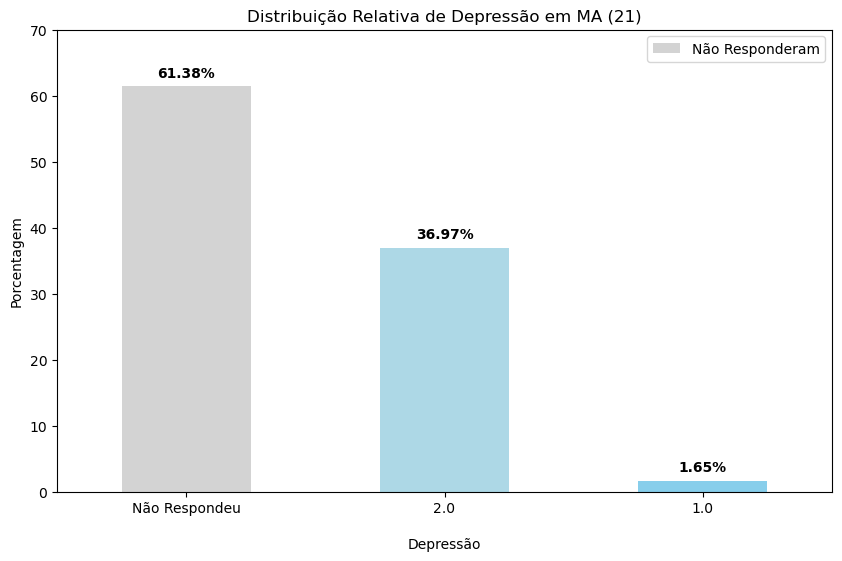

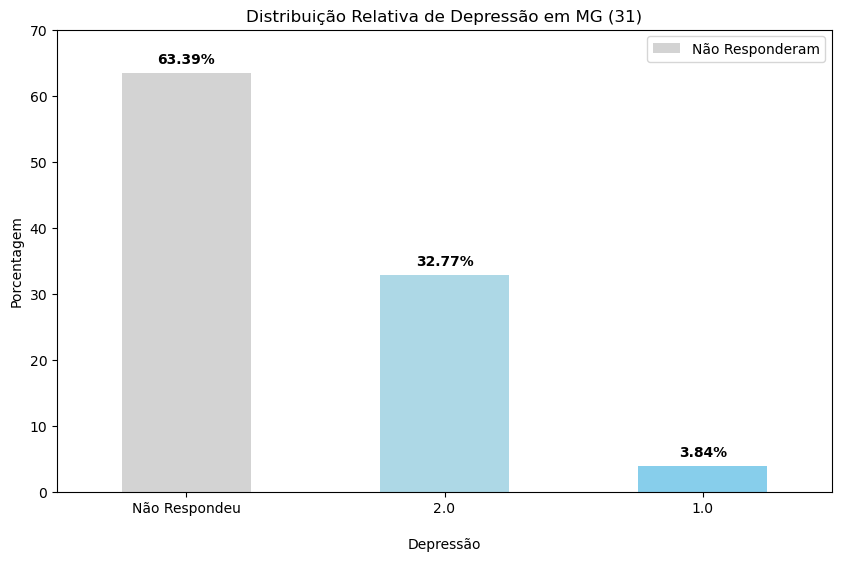

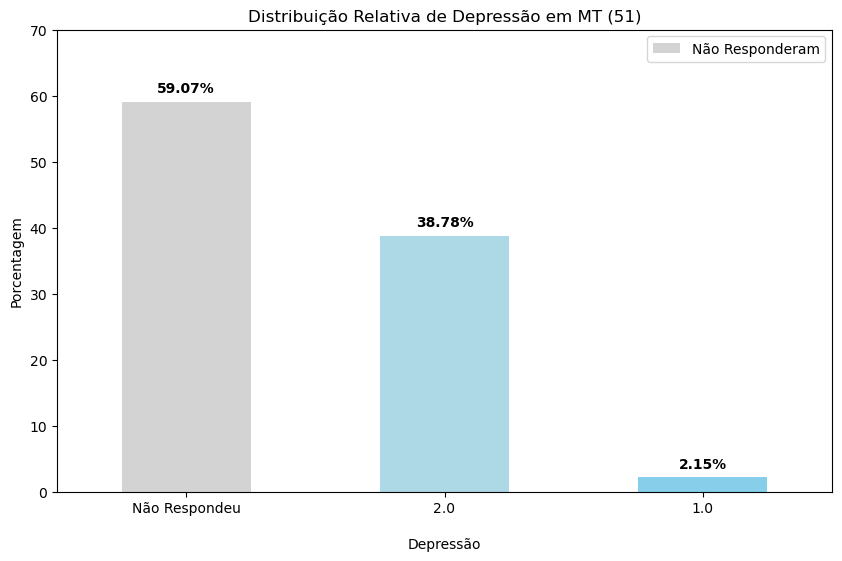

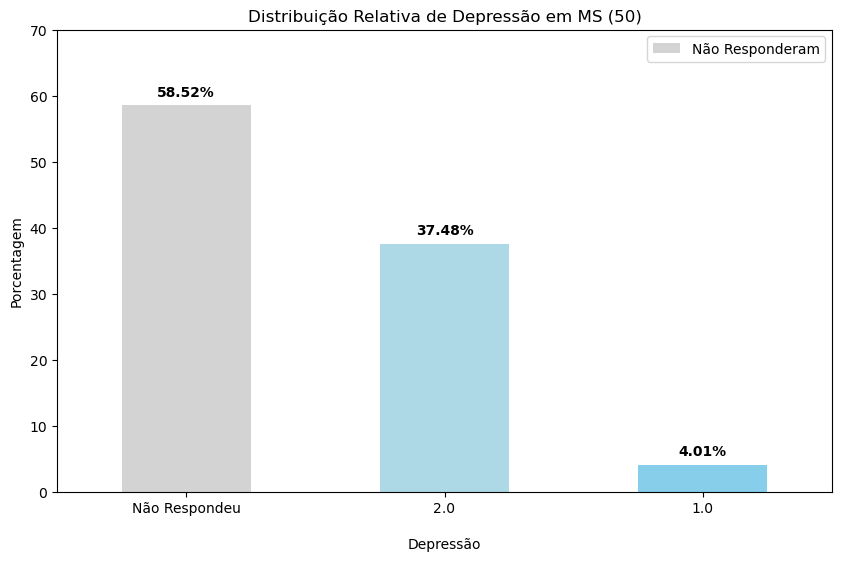

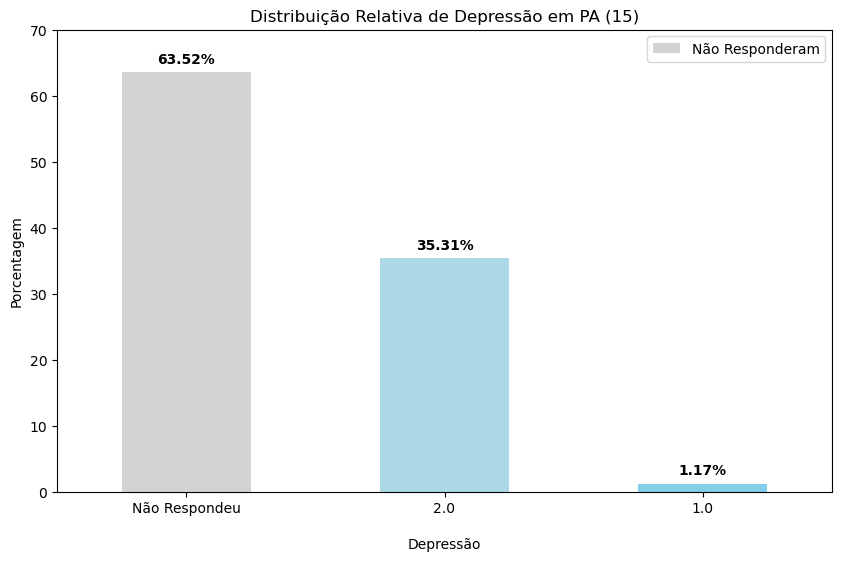

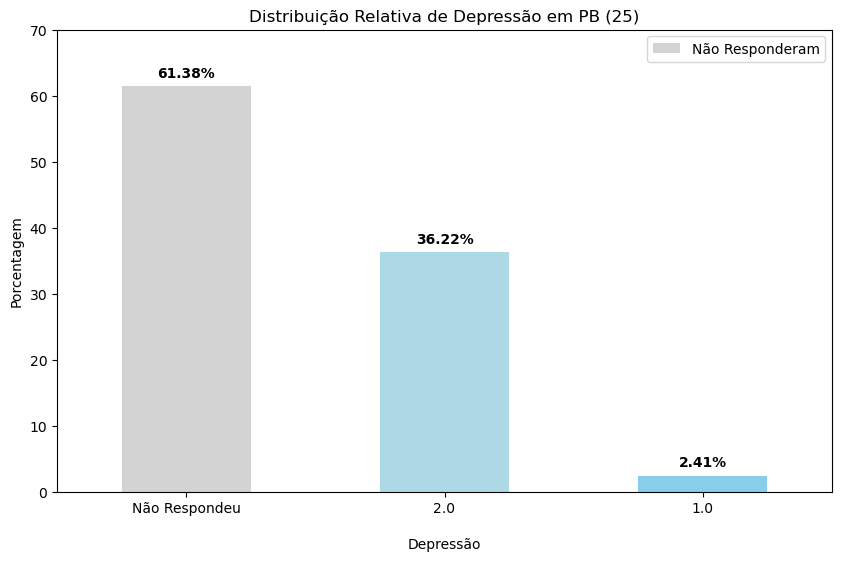

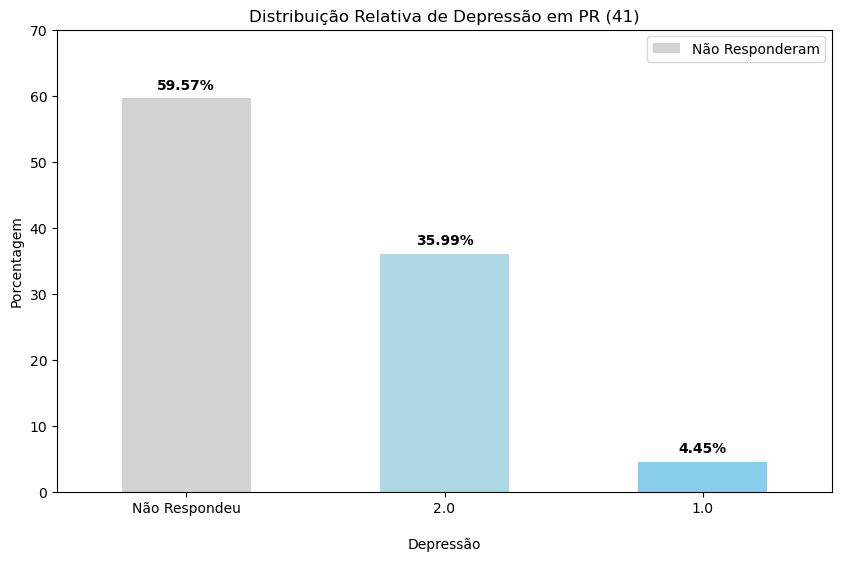

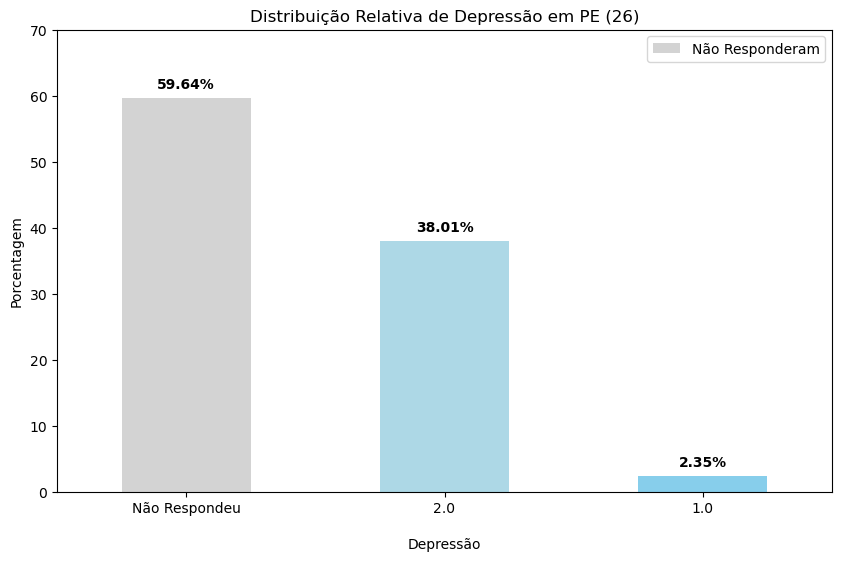

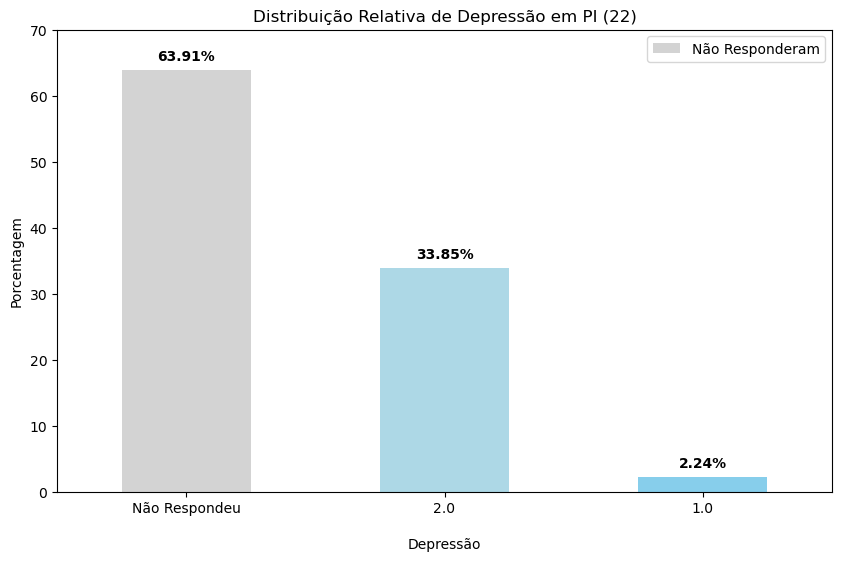

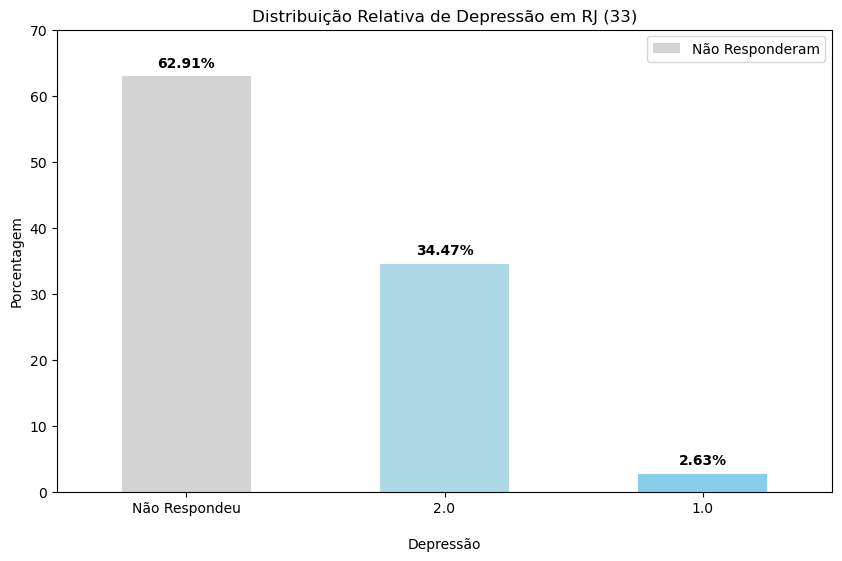

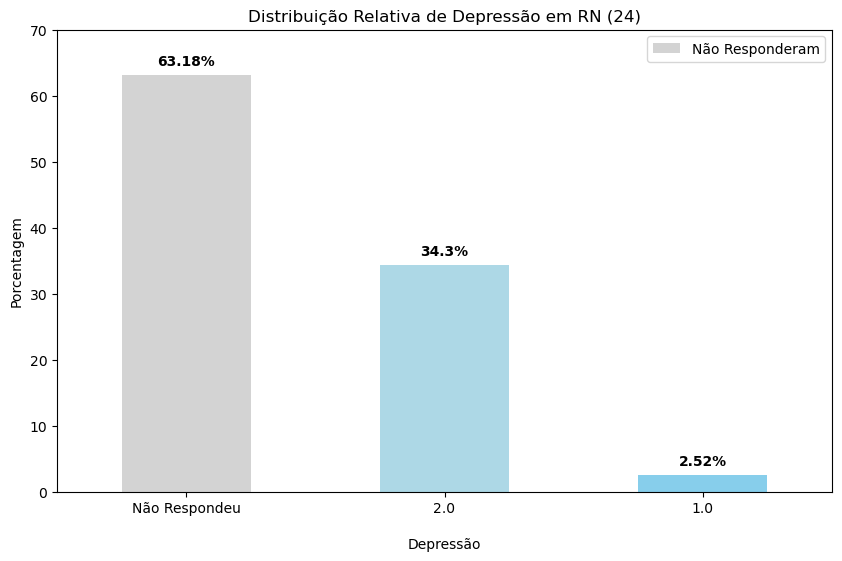

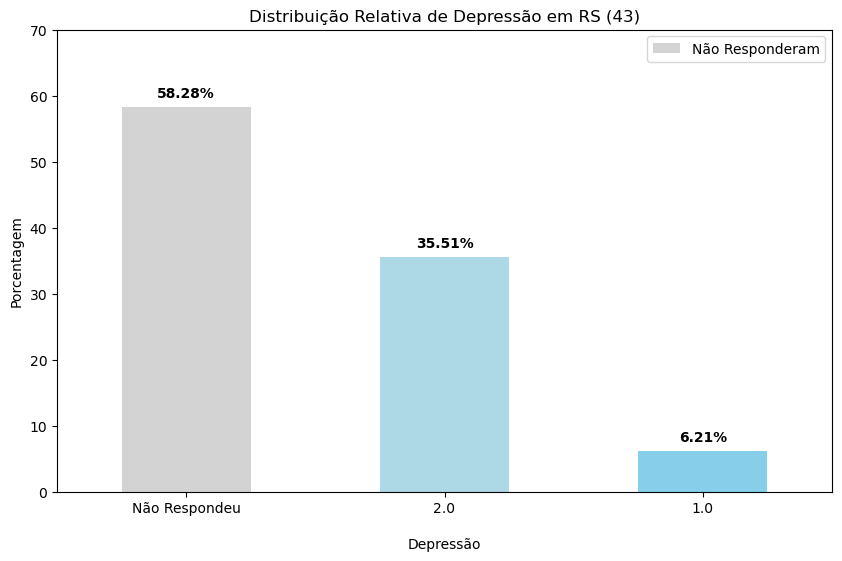

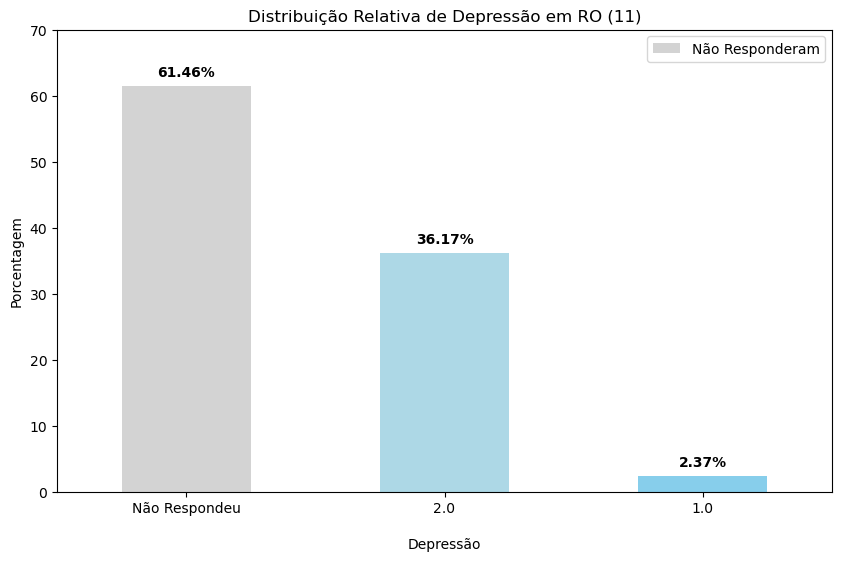

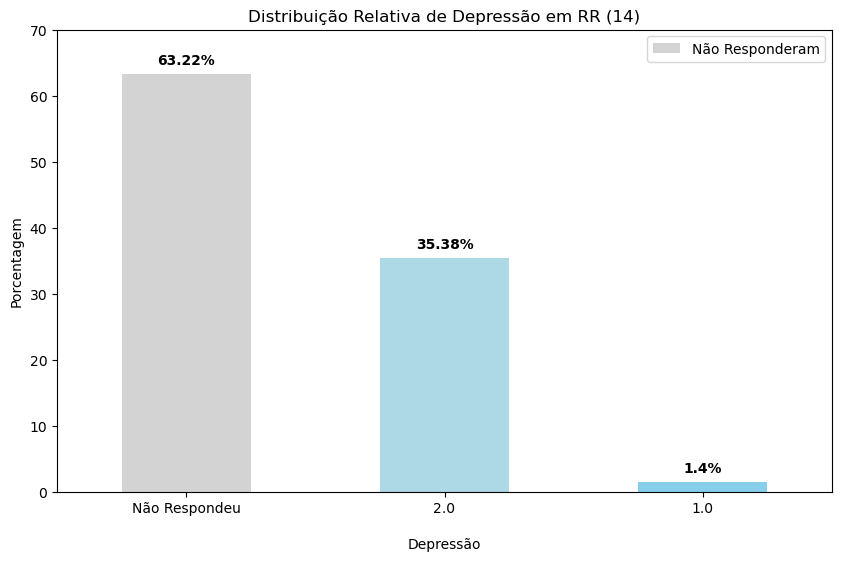

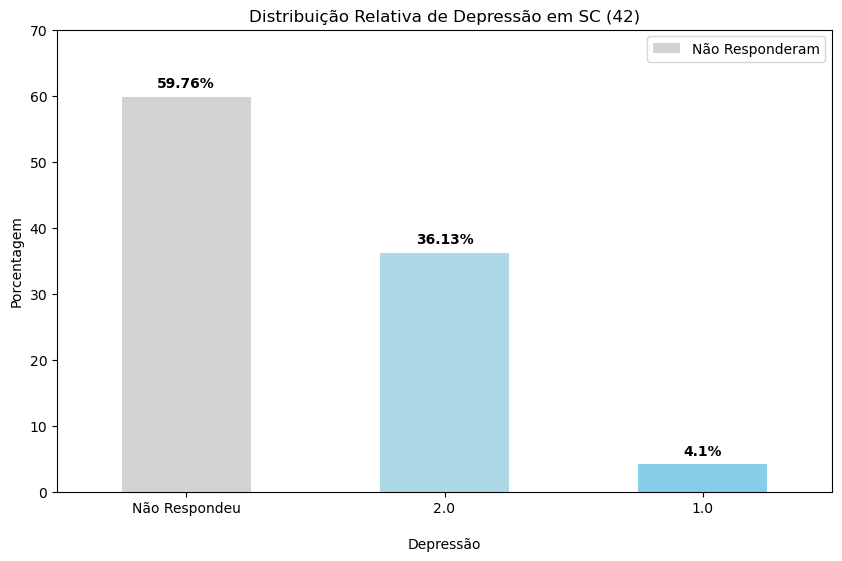

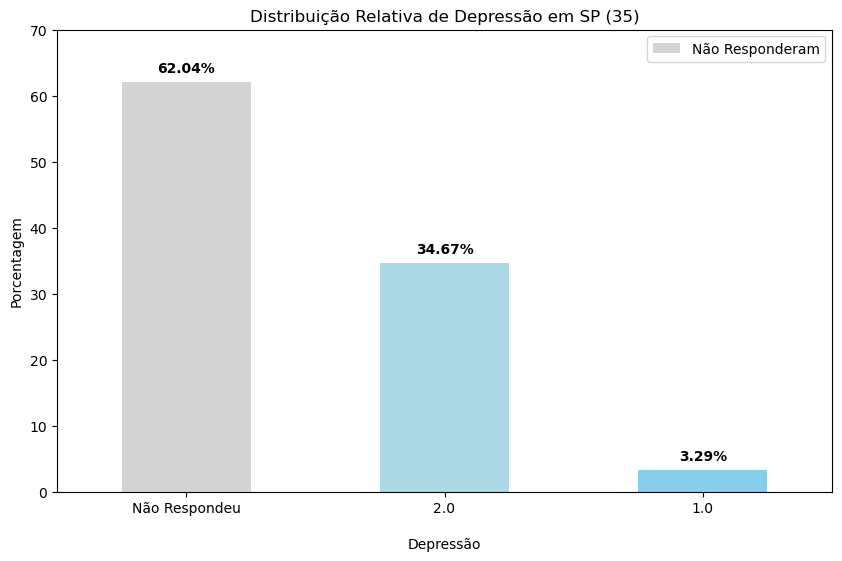

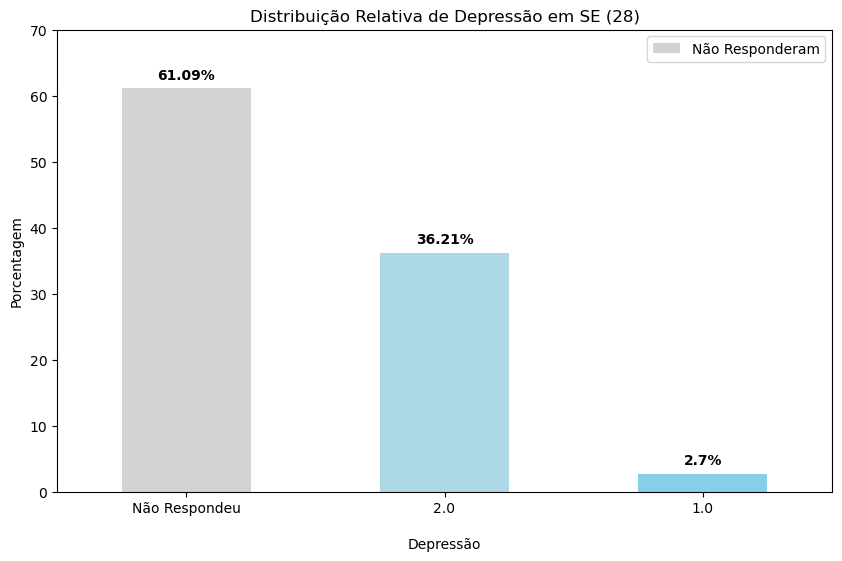

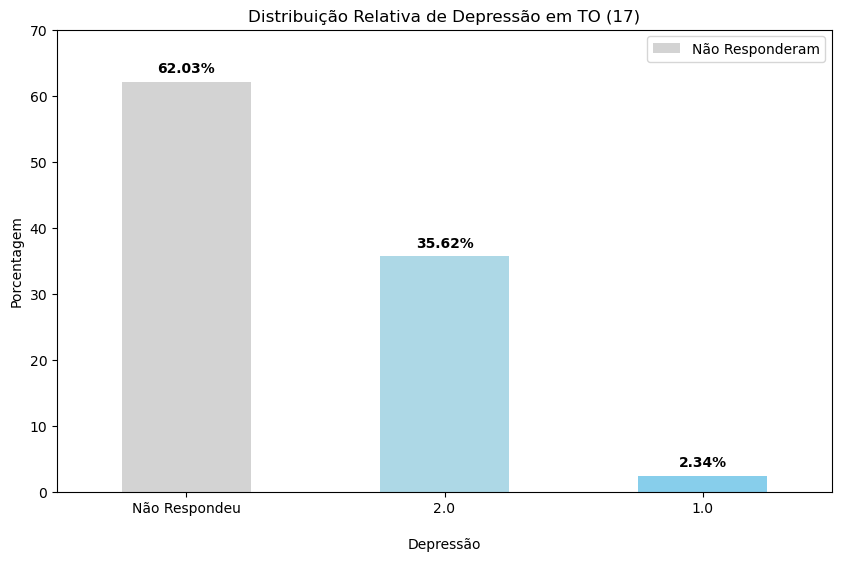

In [47]:
# Iterar sobre as siglas dos estados
for estado in estados:
    # Obter o código do estado
    codigo = codigo_estado[estado]
    
    # Separando o estado
    df_idade_estado = df_idade[df_idade['V0001'] == codigo] #df_idade_total
    
    df_depre_idade_estado = df_depressao_idade[df_depressao_idade['V0001'] == codigo]
    
    # Calcular a porcentagem
    porcentagem_estado = (df_idade_estado['Q092'].value_counts(normalize=True) * 100).round(2)
    
    # Criar um gráfico de barras para cada estado
    plt.figure(figsize=(10, 6))
    ax = porcentagem_estado.plot(kind='bar', color=['lightgray', 'lightblue', 'skyblue'])
    
    # Adicionar rótulos e título
    plt.title(f'Distribuição Relativa de Depressão em {estado} ({codigo})')
    plt.xlabel('\nDepressão')
    plt.ylabel('Porcentagem')
    plt.xticks(rotation=0)
    
    # Adicionar legendas
    plt.legend(['Não Responderam', 'Não Tem Depressão', 'Tem Depressão'])
    
    # Adicionar valores no eixo y
    ax.set_yticks(range(0, 71, 10))
    
    # Adicionar valores exatos no eixo y
    for i, v in enumerate(porcentagem_estado):
        ax.text(i, v + 1, str(v) + '%', ha='center', va='bottom', fontweight='bold')
    
    # Exibir o gráfico
    plt.show()

In [48]:
# Filtrar o DataFrame para incluir apenas as linhas onde J00402 é igual a 12
df_saude_mental = df_idade[df_idade['J00402'] == 12]

In [49]:
df_saude_mental

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
802,11,1110011,110008539,10,1,2019,2.0,1,1,0.0,...,1.0,8.0,5800.0,2900.0,5.0,NaN,NaN,NaN,NaN,20210825
3178,11,1110012,110016527,4,1,2019,2.0,1,1,1.0,...,1.0,8.0,5000.0,2500.0,5.0,NaN,NaN,NaN,NaN,20210825
3717,11,1151011,110001935,4,1,2019,2.0,1,4,1.0,...,1.0,11.0,348.0,174.0,1.0,NaN,NaN,NaN,1.0,20210825
6807,11,1152021,110018590,5,1,2019,2.0,2,4,1.0,...,NaN,NaN,1996.0,998.0,3.0,NaN,NaN,NaN,NaN,20210825
8135,12,1210010,120002684,5,1,2019,5.0,1,1,1.0,...,NaN,NaN,37600.0,7520.0,7.0,NaN,NaN,NaN,NaN,20210825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291141,53,5310211,530037460,2,1,2019,3.0,1,1,0.0,...,1.0,6.0,9000.0,3000.0,6.0,NaN,NaN,NaN,NaN,20210825
292232,53,5310212,530022046,10,1,2019,1.0,1,1,1.0,...,1.0,4.0,700.0,700.0,3.0,NaN,NaN,NaN,NaN,20210825
292367,53,5310212,530030806,1,1,2019,2.0,1,1,0.0,...,1.0,10.0,4000.0,2000.0,5.0,NaN,NaN,NaN,NaN,20210825
292919,53,5310213,530007735,9,1,2019,3.0,1,1,1.0,...,2.0,NaN,1848.0,616.0,3.0,NaN,NaN,NaN,NaN,20210825


In [50]:
df_saude_mental['J00404']


802       2.0
3178      2.0
3717      3.0
6807      3.0
8135      2.0
         ... 
291141    2.0
292232    3.0
292367    2.0
292919    3.0
293354    2.0
Name: J00404, Length: 420, dtype: float64

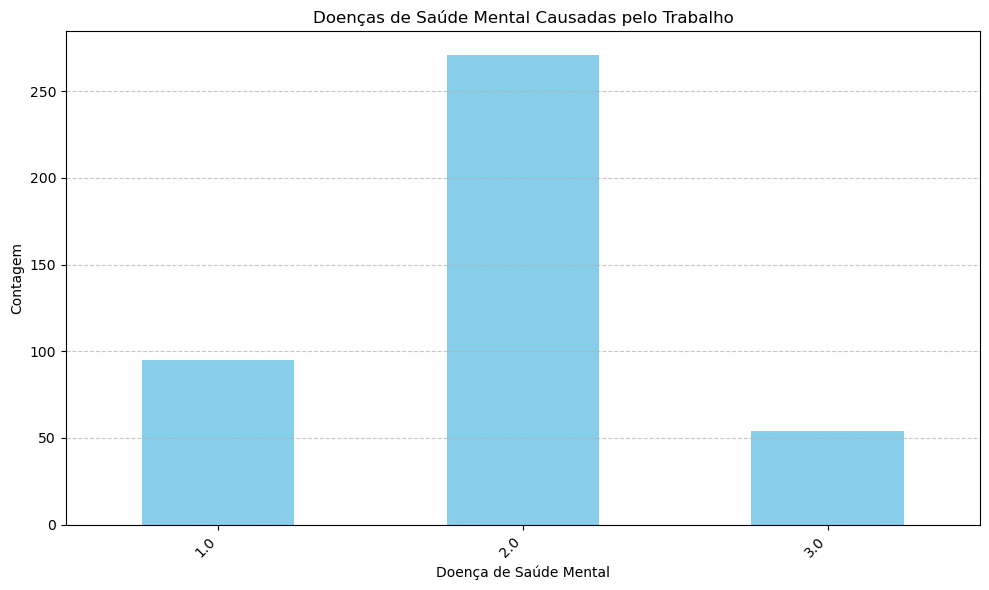

In [51]:

# Agrupar os dados por valores únicos da coluna J00404 e contar ocorrência desses valores
contagem_valores = df_saude_mental.groupby('J00404').size()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
contagem_valores.plot(kind='bar', color='skyblue')
plt.title('Doenças de Saúde Mental Causadas pelo Trabalho')
plt.xlabel('Doença de Saúde Mental')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Graficos de perguntas relacionadas à familia

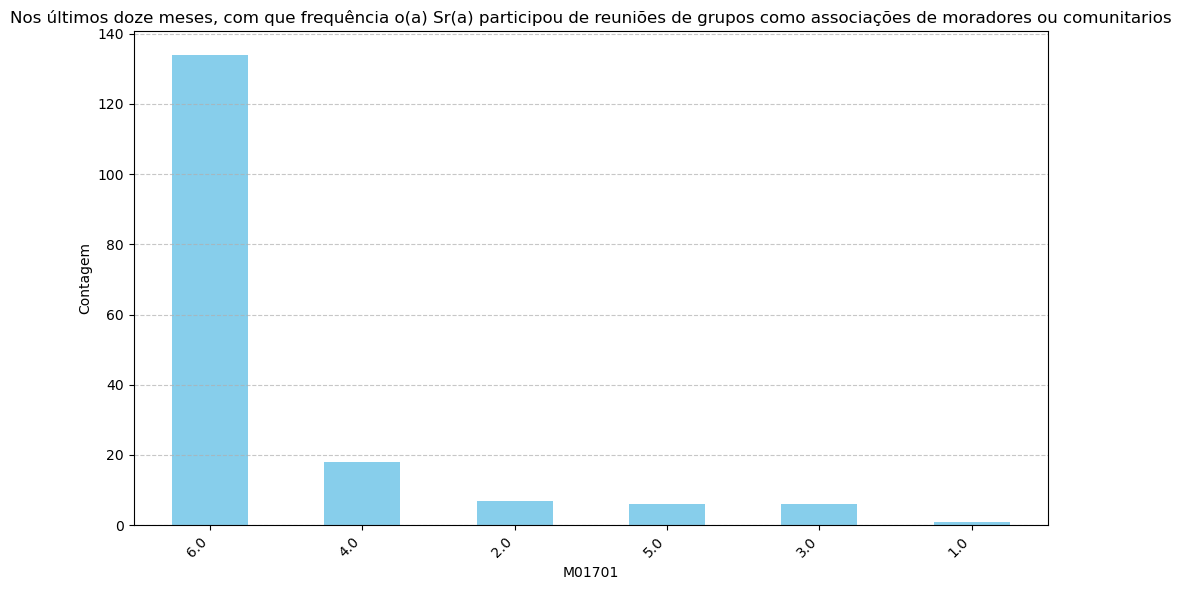

In [52]:
# Agrupar os dados por valores únicos da coluna e contar ocorrência desses valores
contagem_valores = df_saude_mental['M01701'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
contagem_valores.plot(kind='bar', color='skyblue')
plt.title('Nos últimos doze meses, com que frequência o(a) Sr(a) participou de reuniões de grupos como associações de moradores ou comunitarios')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

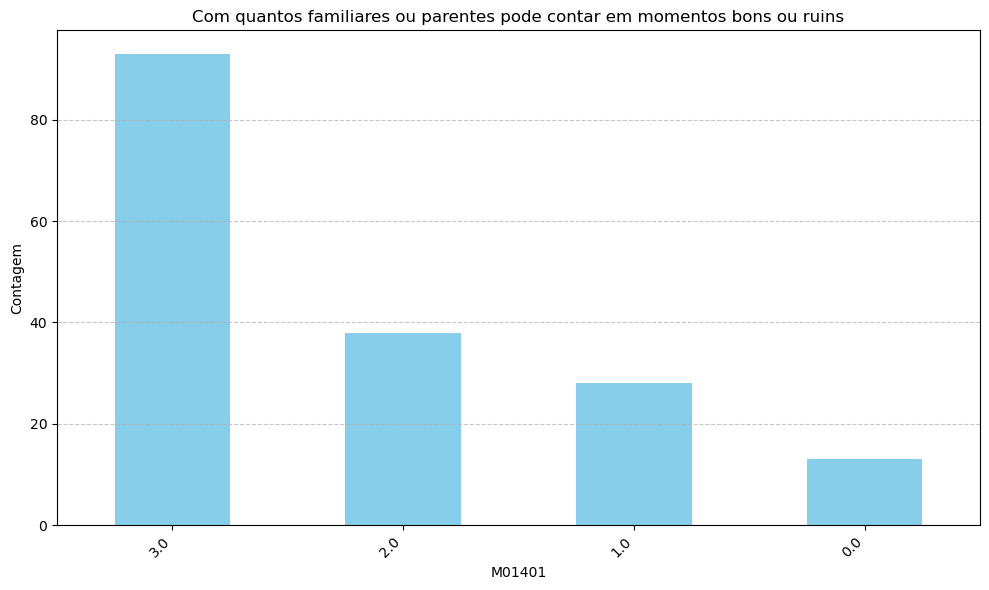

In [53]:
# Agrupar os dados por valores únicos da coluna e contar ocorrência desses valores
contagem_valores = df_saude_mental['M01401'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
contagem_valores.plot(kind='bar', color='skyblue')
plt.title('Com quantos familiares ou parentes pode contar em momentos bons ou ruins')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

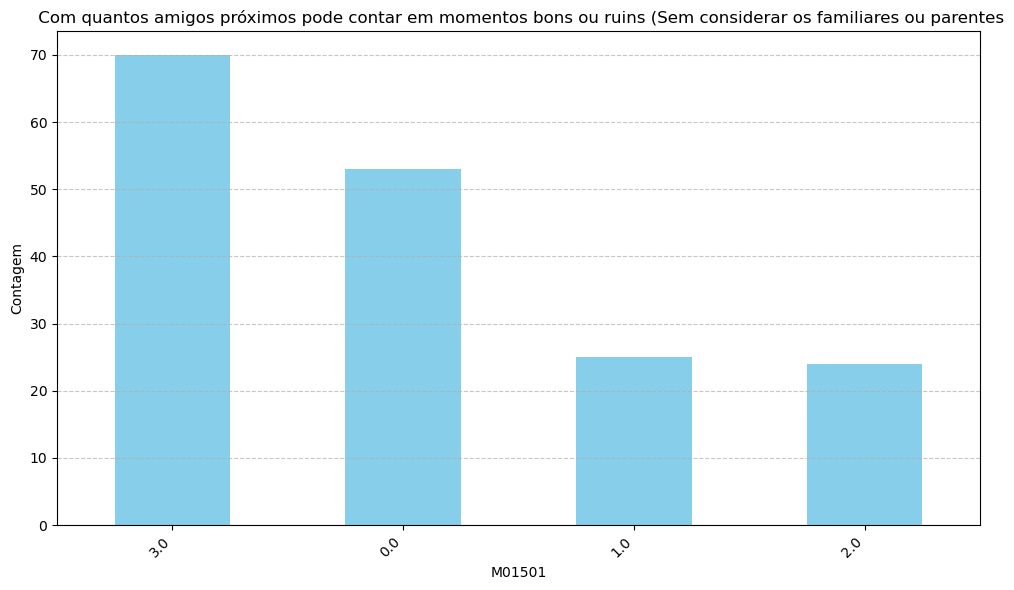

In [54]:
# Agrupar os dados por valores únicos da coluna e contar ocorrência desses valores
contagem_valores = df_saude_mental['M01501'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
contagem_valores.plot(kind='bar', color='skyblue')
plt.title(' Com quantos amigos próximos pode contar em momentos bons ou ruins (Sem considerar os familiares ou parentes')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

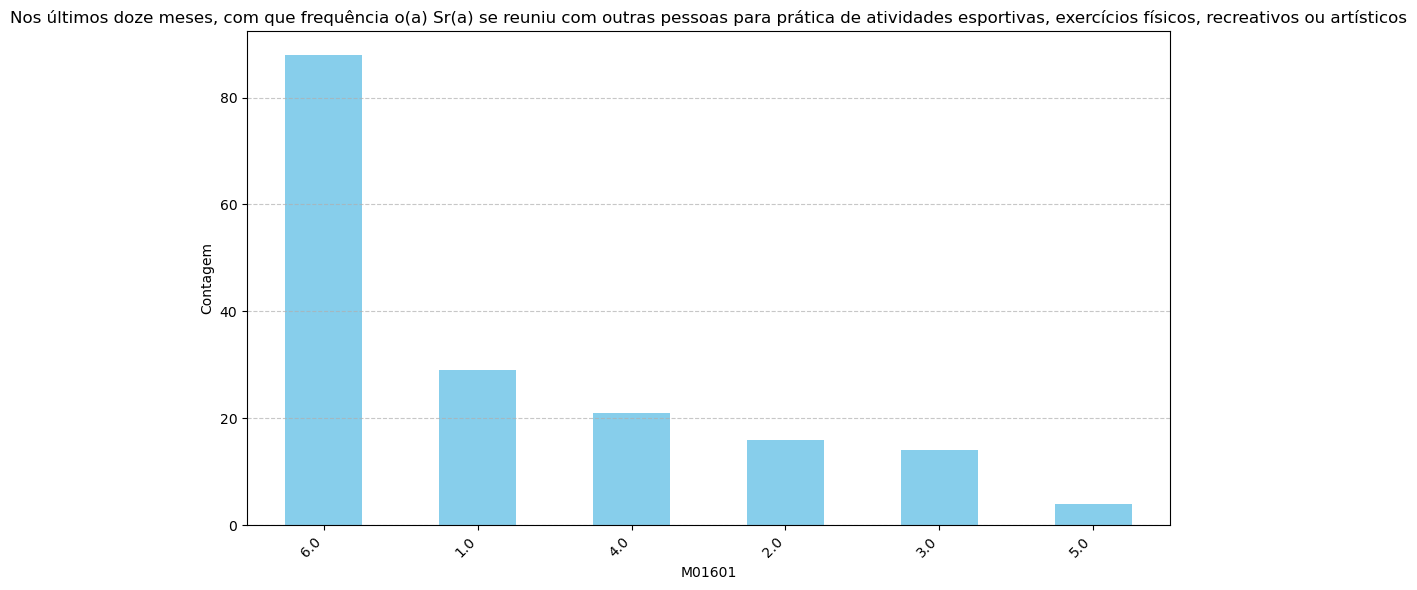

In [55]:
# Agrupar os dados por valores únicos da coluna e contar ocorrência desses valores
contagem_valores = df_saude_mental['M01601'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
contagem_valores.plot(kind='bar', color='skyblue')
plt.title('Nos últimos doze meses, com que frequência o(a) Sr(a) se reuniu com outras pessoas para prática de atividades esportivas, exercícios físicos, recreativos ou artísticos')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

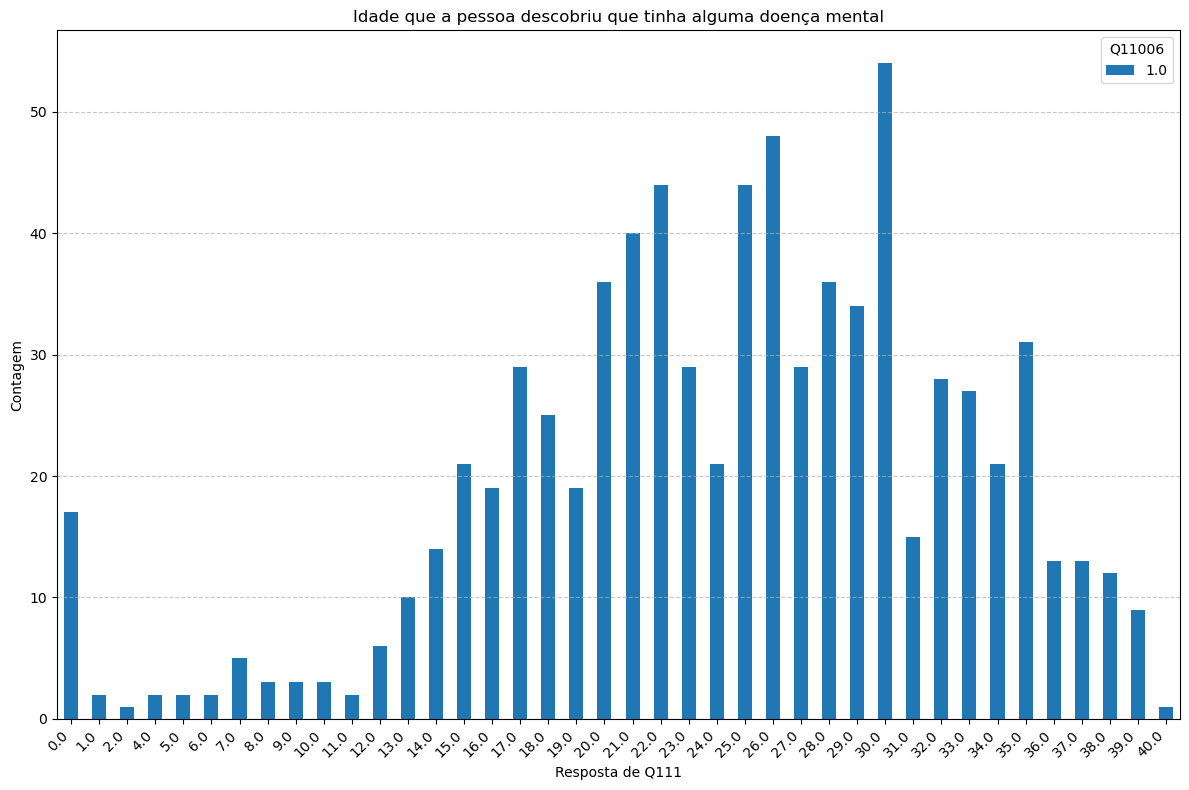

In [56]:
# Calcular a contagem de valores únicos na coluna Q11006 para cada resposta da coluna Q111
contagem_por_resposta = df_depressao_idade.groupby('Q111')['Q11006'].value_counts().unstack()

# Criar o gráfico de barras
contagem_por_resposta.plot(kind='bar', figsize=(12, 8))
plt.title('Idade que a pessoa descobriu que tinha alguma doença mental')
plt.xlabel('Resposta de Q111')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Q11006')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
df_depressao['Q092'].isnull()

0         False
51        False
62        False
73        False
181       False
          ...  
293584    False
293610    False
293629    False
293694    False
293718    False
Name: Q092, Length: 8332, dtype: bool

In [58]:
df_depressao.isnull()

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
51,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
62,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
73,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
181,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293584,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
293610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
293629,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
293694,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False


In [59]:
df_depressao.tail(10)

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
293400,53,5310220,530023953,3,1,2019,3.0,2,1,1.0,...,NaN,NaN,4050.0,1350.0,4.0,NaN,NaN,NaN,NaN,20210825
293403,53,5310220,530023953,4,1,2019,1.0,2,1,1.0,...,2.0,NaN,170.0,170.0,1.0,NaN,NaN,NaN,NaN,20210825
293427,53,5310220,530023953,14,1,2019,2.0,2,1,1.0,...,1.0,7.0,2200.0,1100.0,4.0,NaN,1.0,NaN,NaN,20210825
293429,53,5310220,530023953,15,1,2019,3.0,2,1,1.0,...,1.0,11.0,3100.0,1033.0,4.0,NaN,2.0,NaN,2.0,20210825
293499,53,5310220,530028975,9,1,2019,1.0,2,1,1.0,...,NaN,NaN,7000.0,7000.0,7.0,NaN,NaN,NaN,NaN,20210825
293584,53,5310220,530037924,6,1,2019,3.0,2,1,1.0,...,1.0,4.0,3400.0,1133.0,4.0,NaN,3.0,NaN,1.0,20210825
293610,53,5310220,530037924,15,1,2019,3.0,2,1,1.0,...,1.0,4.0,9594.0,3198.0,6.0,NaN,1.0,NaN,NaN,20210825
293629,53,5310220,530038867,8,1,2019,7.0,2,1,1.0,...,1.0,11.0,3330.0,476.0,2.0,NaN,NaN,NaN,NaN,20210825
293694,53,5310220,530044434,5,1,2019,2.0,2,1,1.0,...,1.0,1.0,2400.0,1200.0,4.0,NaN,3.0,NaN,NaN,20210825
293718,53,5310220,530044434,12,1,2019,3.0,2,1,1.0,...,1.0,2.0,6050.0,2017.0,5.0,NaN,NaN,NaN,NaN,20210825


In [60]:
print(df_idade['J00404'].count())
#J00402 == 12

print(df_idade['Q111'].count())



5079
1941


In [61]:
df_depressao['VDP001'].value_counts()

VDP001
1.0    661
2.0    335
3.0     13
Name: count, dtype: int64

In [62]:
df_depressao_idade.describe()

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
count,2279.000000,2.279000e+03,2.279000e+03,2279.000000,2279.0,2279.0,2279.000000,2279.000000,2279.000000,2279.0,...,1675.000000,1492.000000,2279.000000,2279.000000,2279.000000,0.0,1241.000000,289.000000,1203.000000,2279.0
mean,32.253181,3.256202e+06,3.226209e+08,7.173760,1.0,2019.0,3.238701,1.166740,2.524353,1.0,...,1.109254,6.565684,4293.604212,1628.371215,3.416849,NaN,2.259468,1.307958,4.133832,20210825.0
std,11.652770,1.163567e+06,1.165418e+08,4.007411,0.0,0.0,1.436106,0.372825,1.391748,0.0,...,0.312050,3.053136,6105.505966,2528.737395,1.661155,NaN,1.117475,0.477230,1.862908,0.0
min,11.000000,1.110011e+06,1.100000e+08,1.000000,1.0,2019.0,1.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,20210825.0
25%,24.000000,2.410011e+06,2.400143e+08,4.000000,1.0,2019.0,2.000000,1.000000,1.000000,1.0,...,1.000000,4.000000,1309.500000,425.000000,2.000000,NaN,1.000000,1.000000,3.000000,20210825.0
50%,32.000000,3.210011e+06,3.200063e+08,7.000000,1.0,2019.0,3.000000,1.000000,2.000000,1.0,...,1.000000,7.000000,2500.000000,843.000000,3.000000,NaN,2.000000,1.000000,5.000000,20210825.0
75%,42.000000,4.220011e+06,4.200350e+08,10.000000,1.0,2019.0,4.000000,1.000000,4.000000,1.0,...,1.000000,9.000000,4800.500000,1731.000000,4.000000,NaN,3.000000,2.000000,5.000000,20210825.0
max,53.000000,5.310220e+06,5.300496e+08,18.000000,1.0,2019.0,14.000000,2.000000,4.000000,1.0,...,2.000000,11.000000,74500.000000,36600.000000,7.000000,NaN,4.000000,3.000000,9.000000,20210825.0


In [63]:
df_idade['V0001'].count()

86995

In [64]:
#print(((df_depressao_idade['V0001'].count()/df_idade['V0001'].count())*100).round(2))
print((df_idade['Q092'].value_counts(normalize=True)*100).round(2))
print((df['Q092']).count())

Q092
Não Respondeu    61.70
2.0              35.68
1.0               2.62
Name: proportion, dtype: float64
90846


### Porcentagem Depressão no Brasil inteiro

Q092
Não Respondeu    61.70
2.0              35.68
1.0               2.62
Name: proportion, dtype: float64


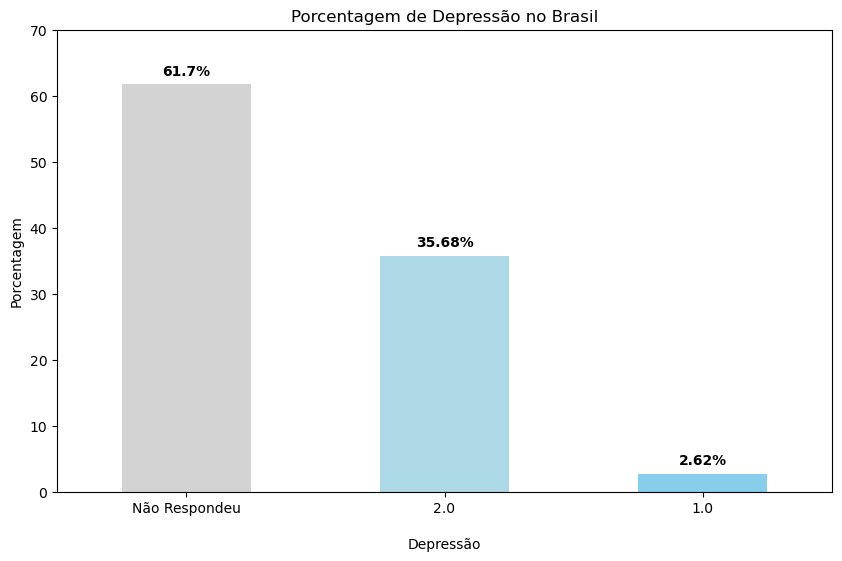

In [65]:
    # Calcular a porcentagem
    #porcentagem_brasil = ((df_depressao_idade['V0001'].count()/df_idade['V0001'].count())*100).round(2)
    
    # Calcular a porcentagem
    porcentagem_brasil = (df_idade['Q092'].value_counts(normalize=True) * 100).round(2)
    print(porcentagem_brasil)
    
    # Criar um gráfico de barras para cada estado
    plt.figure(figsize=(10, 6))
    ax = porcentagem_brasil.plot(kind='bar', color=['lightgray', 'lightblue', 'skyblue'])
    
    # Adicionar rótulos e título
    plt.title('Porcentagem de Depressão no Brasil')
    plt.xlabel('\nDepressão')
    plt.ylabel('Porcentagem')
    plt.xticks(rotation=0)
    
    
    # Adicionar valores no eixo y
    ax.set_yticks(range(0, 71, 10))
    
    # Adicionar valores exatos no eixo y
    for i, v in enumerate(porcentagem_brasil):
        ax.text(i, v + 1, str(v) + '%', ha='center', va='bottom', fontweight='bold')
    
    # Exibir o gráfico
    plt.show()

#### Colunas que podem ser deletadas, por terem muitos dados vazios

In [66]:
print(df_idade['VDL001'].count())
print(df_idade['VDR001'].count())
print(df_idade['VDP001'].count())
print(df_idade['VDM001'].count())
print(df_idade['Q092'].count())

print(df_idade.shape)

0
11929
2959
21444
86995
(86995, 1087)


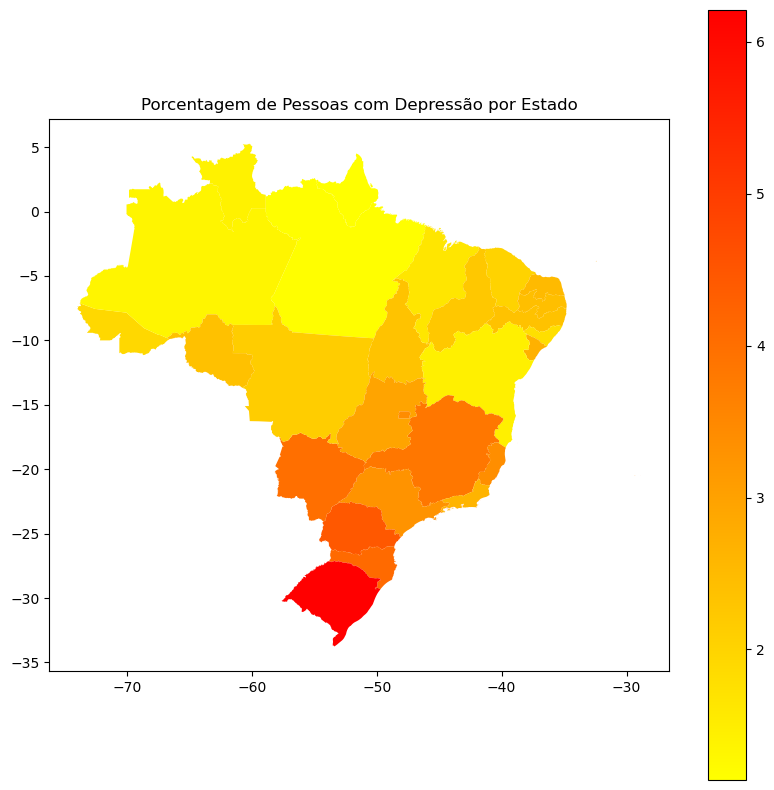

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregue o shapefile dos estados brasileiros
shapefile_path = 'BR_UF_2022/BR_UF_2022.shp'
gdf = gpd.read_file(shapefile_path)

# Carregue os dados da porcentagem de depressão (substitua pelos seus dados reais)
porcentagem_depressao = {
    'AC': 1.92, 'AL': 1.79, 'AP': 1.14, 'AM': 1.35, 'BA': 1.44, 'CE': 2.02, 'DF': 3.43, 'ES': 3.39, 'GO': 2.95,
                 'MA': 1.65, 'MG': 3.84, 'MT': 2.15, 'MS': 4.01, 'PA': 1.17, 'PB': 2.41, 'PR': 4.45, 'PE': 2.35, 'PI': 2.24, 'RJ': 2.63,
                 'RN': 2.52, 'RS': 6.21, 'RO': 2.37, 'RR': 1.40, 'SC': 4.10, 'SP': 3.29, 'SE': 2.70, 'TO': 2.34
}

# Junte os dados
gdf['Porcentagem_Depressao'] = gdf['SIGLA_UF'].map(porcentagem_depressao)

# Plote o mapa
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='Porcentagem_Depressao', cmap='autumn_r', legend=True, ax=ax)
plt.title('Porcentagem de Pessoas com Depressão por Estado')
plt.show()


Porcentagem PE (26): 2.35%

Porcentagem PI (22): 2.24%

Porcentagem RJ (33): 2.63%

Porcentagem RN (24): 2.52%

Porcentagem RS (43): 6.21%

Porcentagem RO (11): 2.37%

Porcentagem RR (14): 1.40%

Porcentagem SC (42): 4.10%

Porcentagem SP (35): 3.29%

Porcentagem SE (28): 2.70%

Porcentagem TO (17): 2.34%